In [3]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

set.seed(1)




options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 500)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_finale.Rdata")

df <- df_finale


## Data partition

In [4]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [5]:
prop.table(table(test$deg_cat))


     fast   NotFast 
0.3484487 0.6515513 

In [6]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    488     488 

## Model

In [7]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [8]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 



+ Fold01.Rep1: nIter=92 
- Fold01.Rep1: nIter=92 
+ Fold02.Rep1: nIter=92 
- Fold02.Rep1: nIter=92 
+ Fold03.Rep1: nIter=92 
- Fold03.Rep1: nIter=92 
+ Fold04.Rep1: nIter=92 
- Fold04.Rep1: nIter=92 
+ Fold05.Rep1: nIter=92 
- Fold05.Rep1: nIter=92 
+ Fold06.Rep1: nIter=92 
- Fold06.Rep1: nIter=92 
+ Fold07.Rep1: nIter=92 
- Fold07.Rep1: nIter=92 
+ Fold08.Rep1: nIter=92 
- Fold08.Rep1: nIter=92 
+ Fold09.Rep1: nIter=92 
- Fold09.Rep1: nIter=92 
+ Fold10.Rep1: nIter=92 
- Fold10.Rep1: nIter=92 
Aggregating results
Selecting tuning parameters
Fitting nIter = 14 on full training set


In [9]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost=  0.2075, loss=L1, epsilon=1 
- Fold01.Rep1: cost=  0.2075, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=668.5083, loss=L1, epsilon=1 
- Fold01.Rep1: cost=668.5083, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=  4.8828, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost=  4.8828, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=  0.2075, loss=L1, epsilon=1 
- Fold02.Rep1: cost=  0.2075, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=668.5083, loss=L1, epsilon=1 
- Fold02.Rep1: cost=668.5083, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=  4.8828, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost=  4.8828, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=  0.2075, loss=L1, epsilon=1 
- Fold03.Rep1: cost=  0.2075, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=668.5083, loss=L1, epsilon=1 
- Fold03.Rep1: cost=668.5083, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=  4.8828, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost=  4.8828, loss=L2_dual, epsilon=1 
+ Fold04.Rep1: cost=  0.2075, loss=L1, epsilon=1 
- Fold04.Rep1: cost=

## Results

Boosted Logistic Regression 

976 samples
 73 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 878, 879, 879, 879, 878, 878, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  14     0.7782028  0.5545936
  69     0.7254576  0.4508244
  92     0.7571907  0.5137524

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 14.


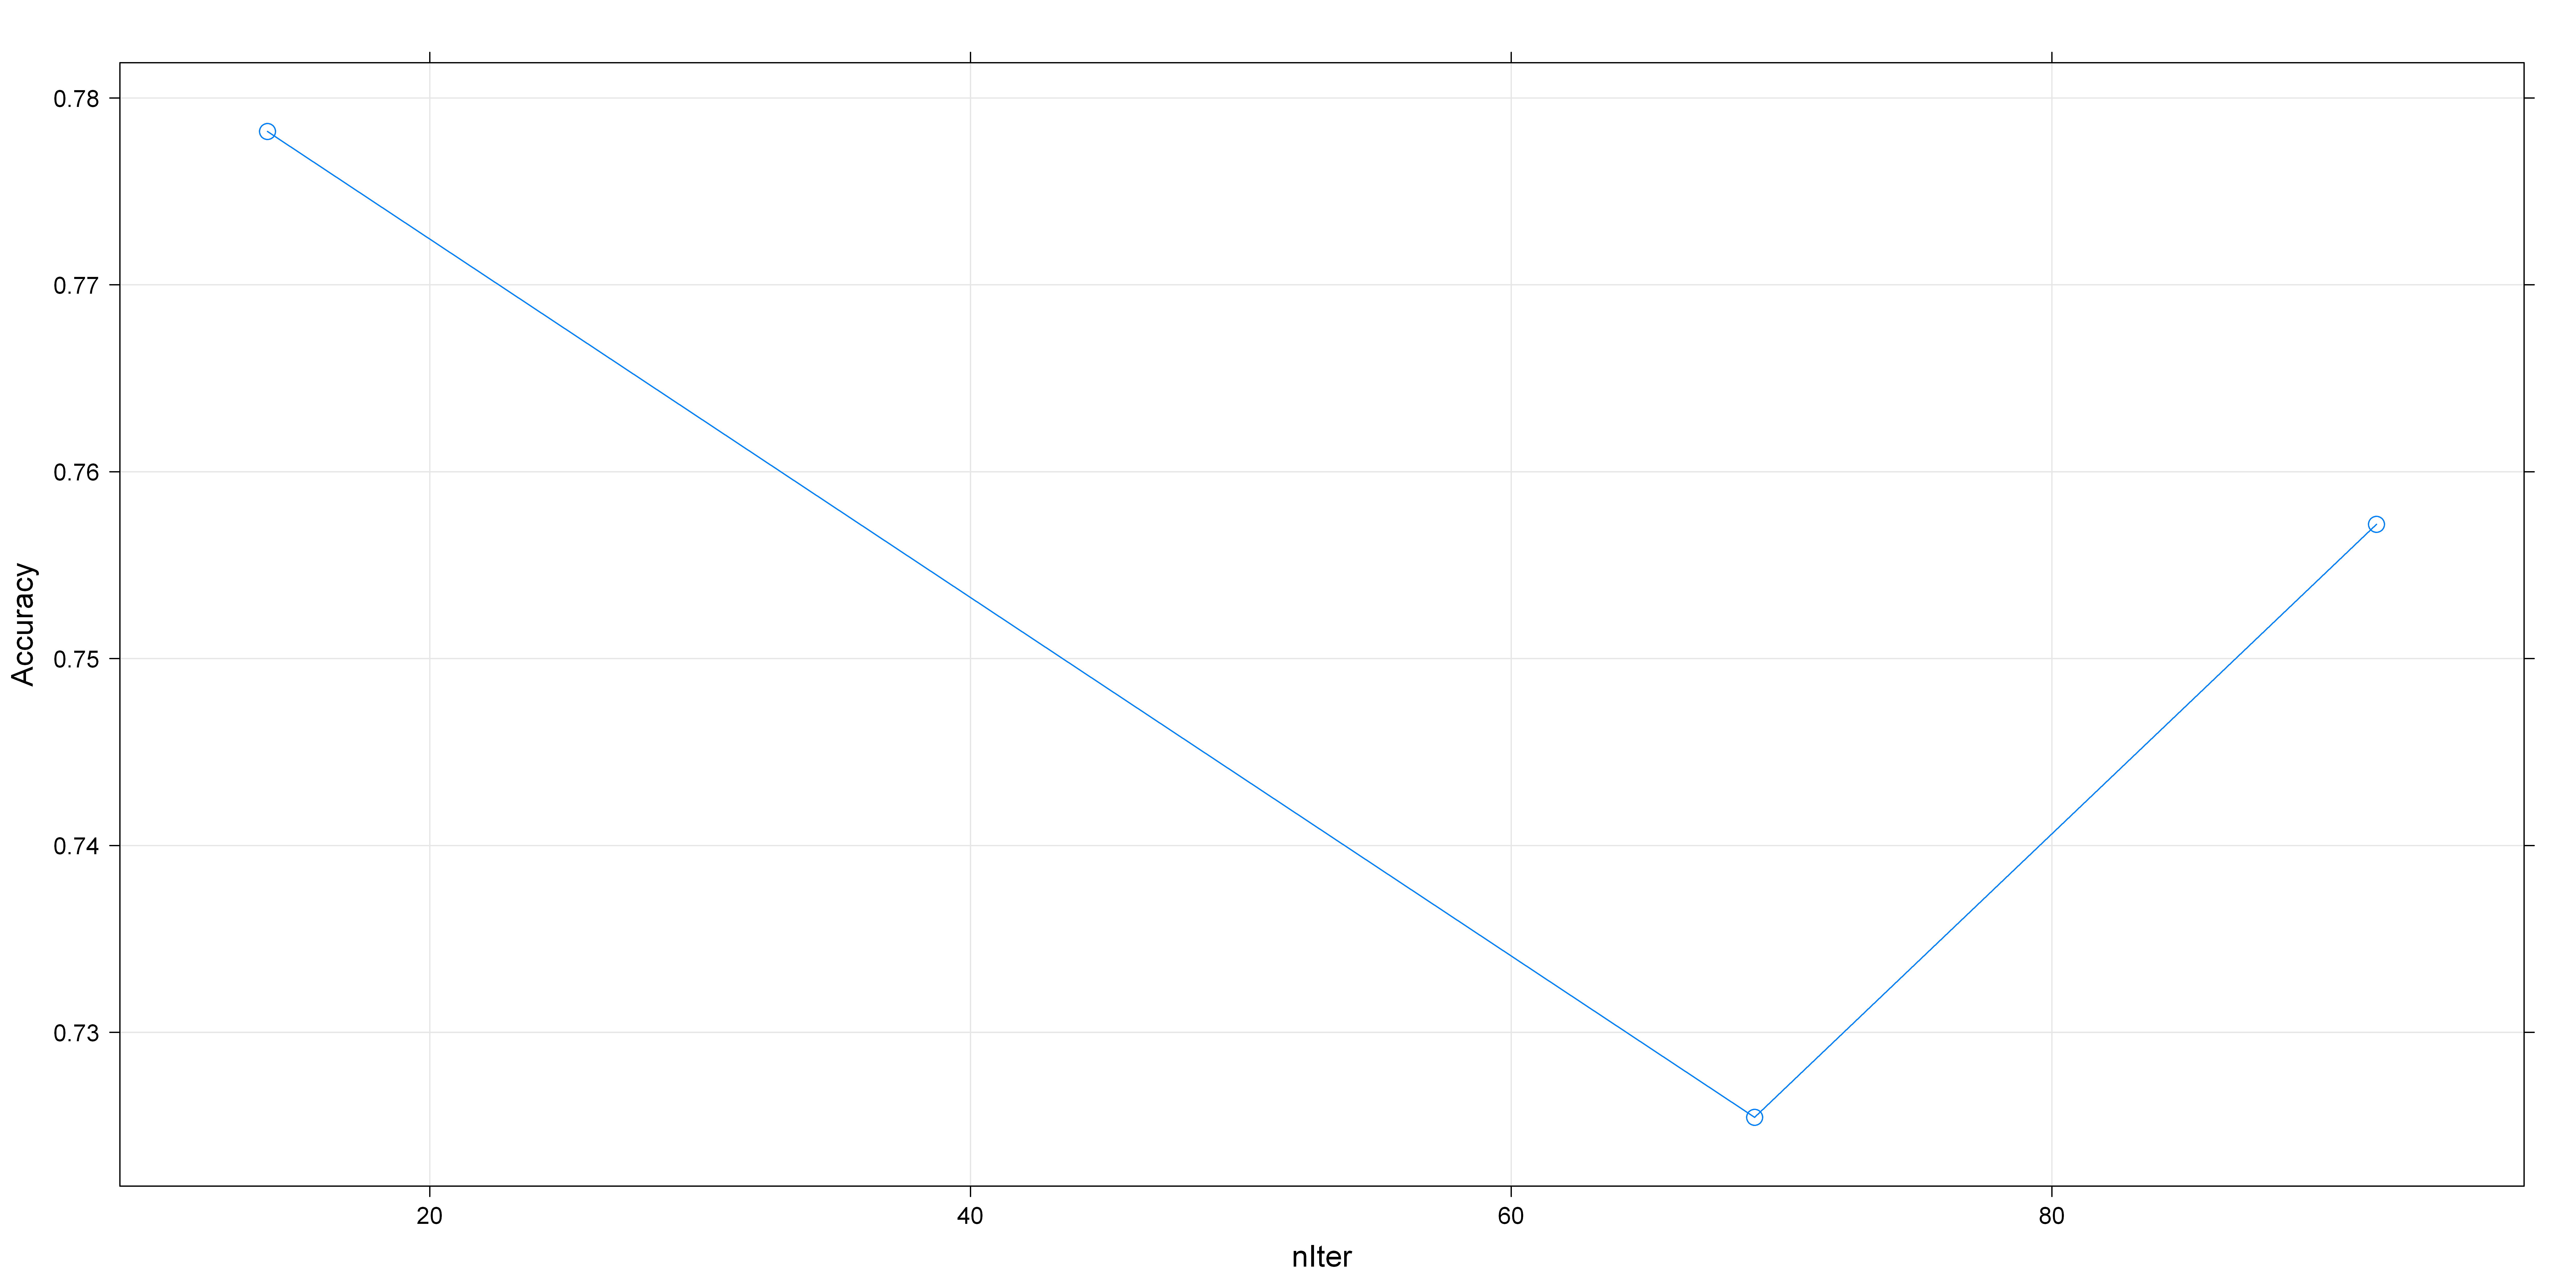

In [10]:
print(model_logitBoost)
plot(model_logitBoost,  cex= 1.5,  xlab = list( cex = 1.4), ylab = list( cex = 1.4), scales = list(x = list(cex=1.1),y=list(cex=1.1)))

Regularized Logistic Regression 

976 samples
 73 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 878, 878, 879, 878, 878, 878, ... 
Resampling results across tuning parameters:

  cost         loss     Accuracy   Kappa    
    0.2075263  L1       0.7253024  0.4506126
    4.8827565  L2_dual  0.7346244  0.4691796
  668.5083152  L1       0.7274921  0.4549682

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 4.882756, loss = L2_dual
 and epsilon = 1.


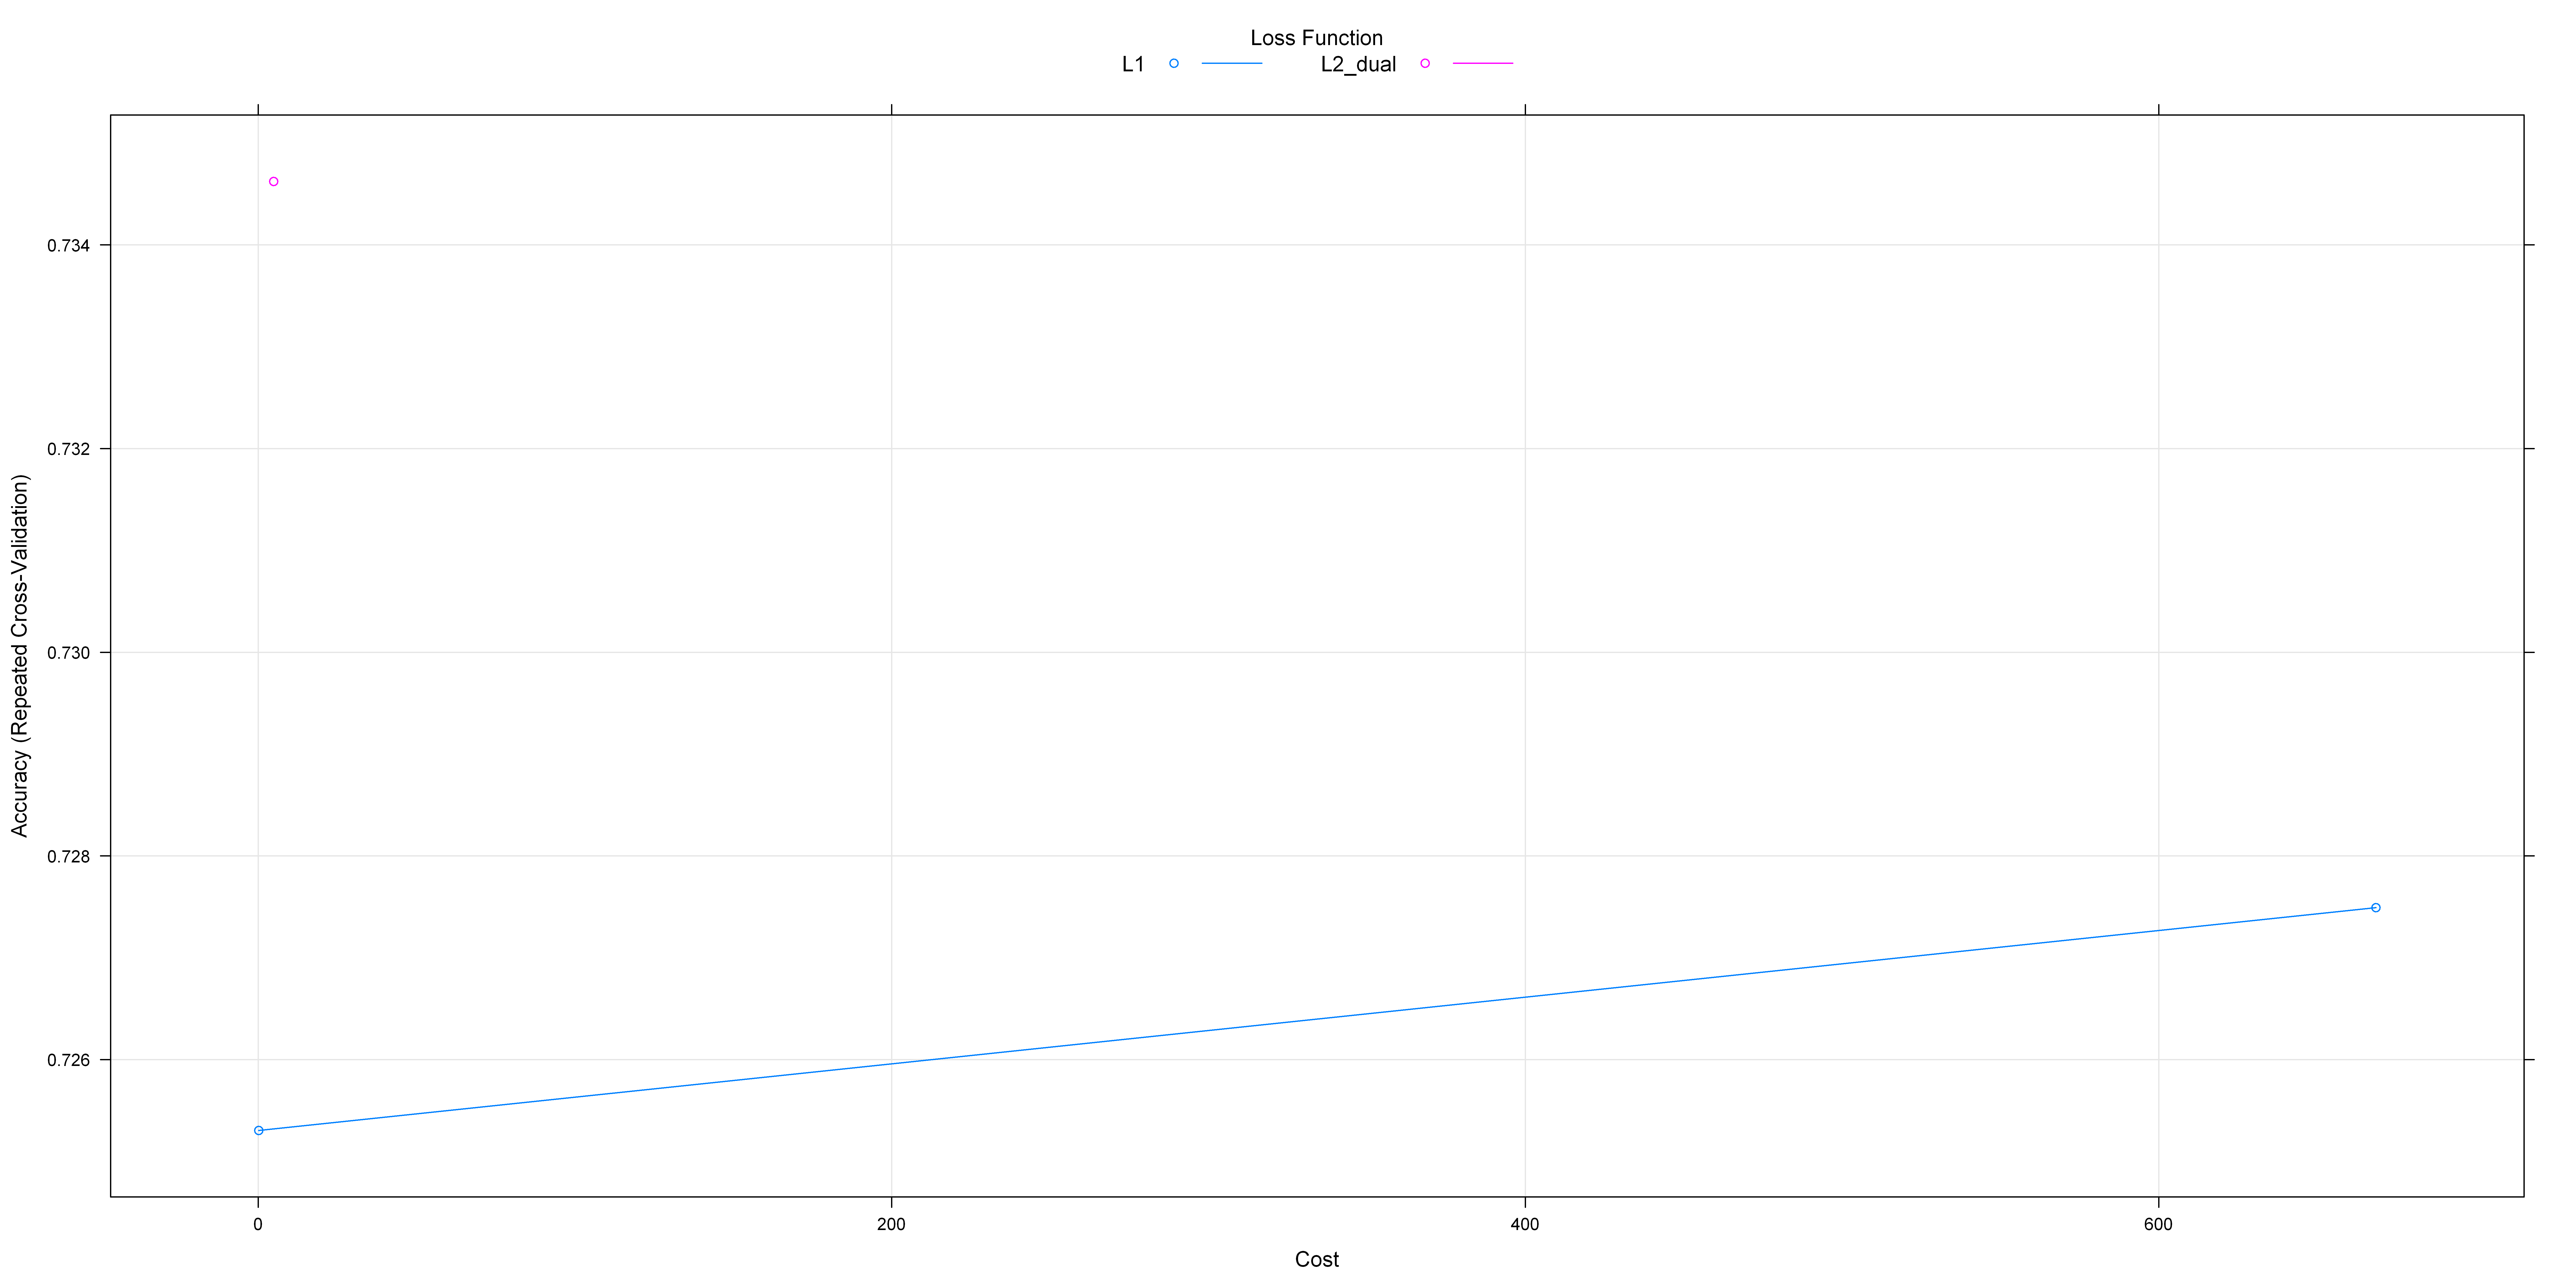

In [11]:
print(model_regLogistic)
plot(model_regLogistic)

In [12]:
varImp(model_regLogistic)

ROC curve variable importance

  only 20 most important variables shown (out of 73)

                         Importance
realMELDNa                   100.00
IntraoperativTransfected      84.31
centreCode                    78.11
ratioPaO2FiO2                 68.63
surgeryDuration               65.71
plasmaPools                   63.66
albumina                      62.45
presentRefractAscites         58.96
platCountTranspl              57.34
intermedLactates              56.96
noradrenalineEndSurger        43.09
tumore                        41.08
new_admWard                   39.97
EPScum                        39.13
syndromeReperfus              34.37
albumInfusOver7Days           33.04
degenzaPreTra                 30.31
CRIOprecipitated              23.30
organDonorProvenance          22.46
organDonorDrawalSodiemia      22.13


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.7105263 0.7634576 0.7856419 0.7782028 0.7913389 0.8461538    0
regLogistic 0.6632653 0.7117347 0.7346939 0.7346244 0.7595466 0.7938144    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.4238456 0.5181327 0.5693039 0.5545936 0.5796337 0.6916509    0
regLogistic 0.3265306 0.4234694 0.4693878 0.4691796 0.5191069 0.5868825    0


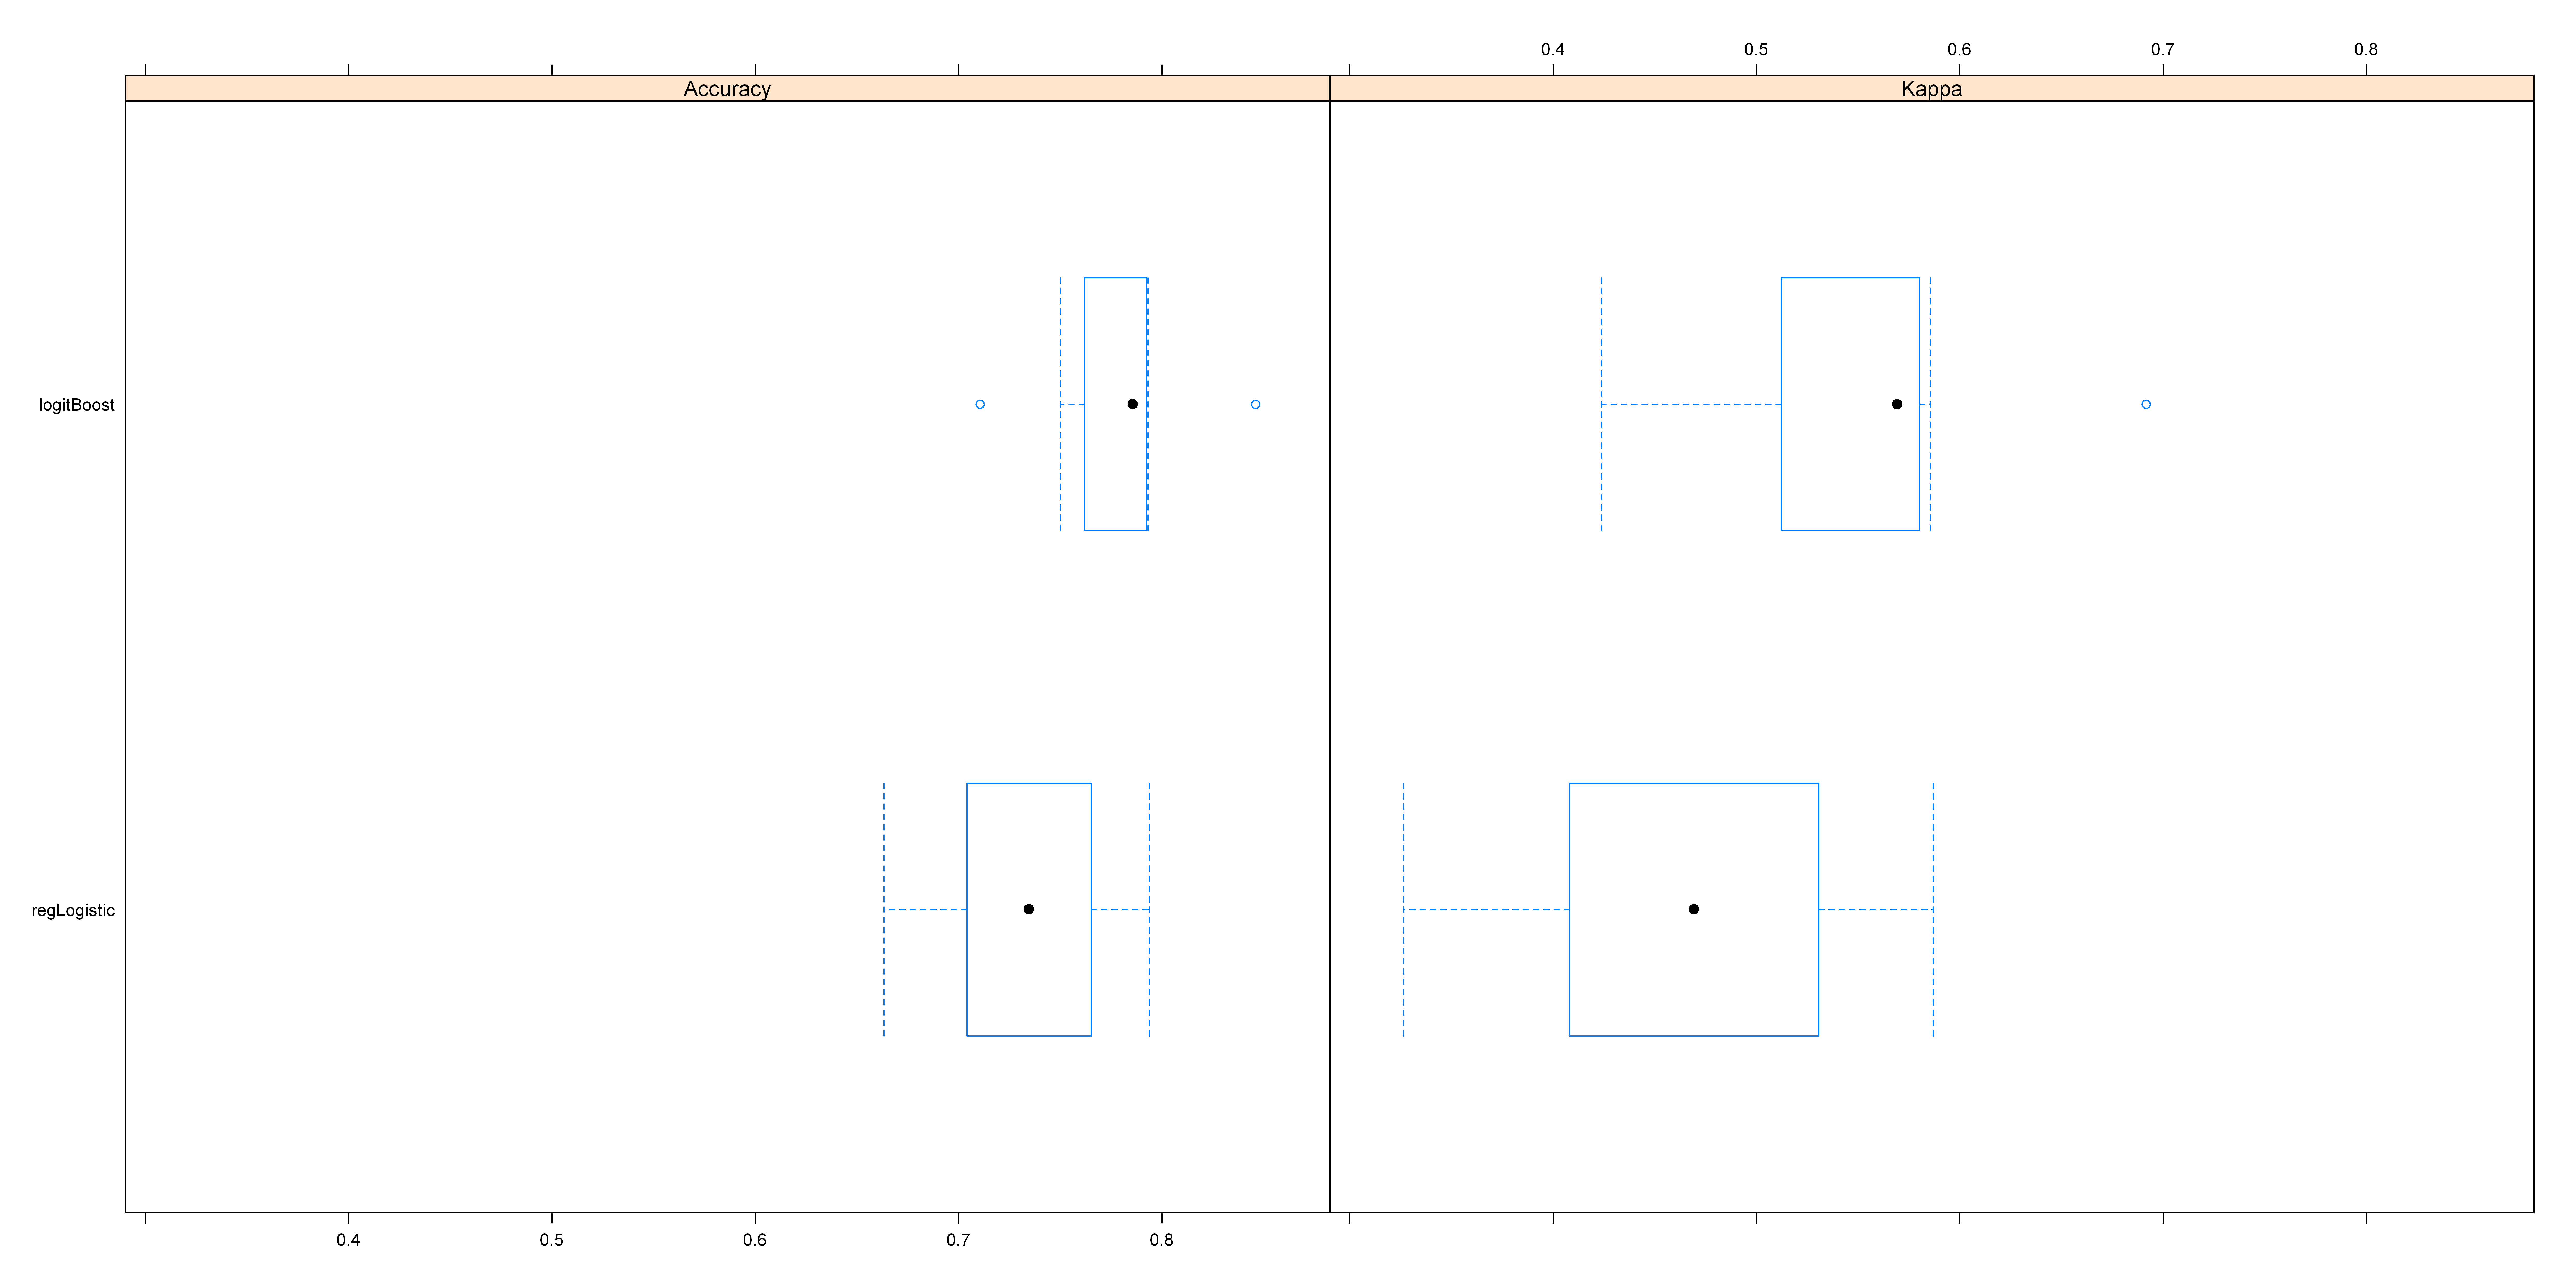

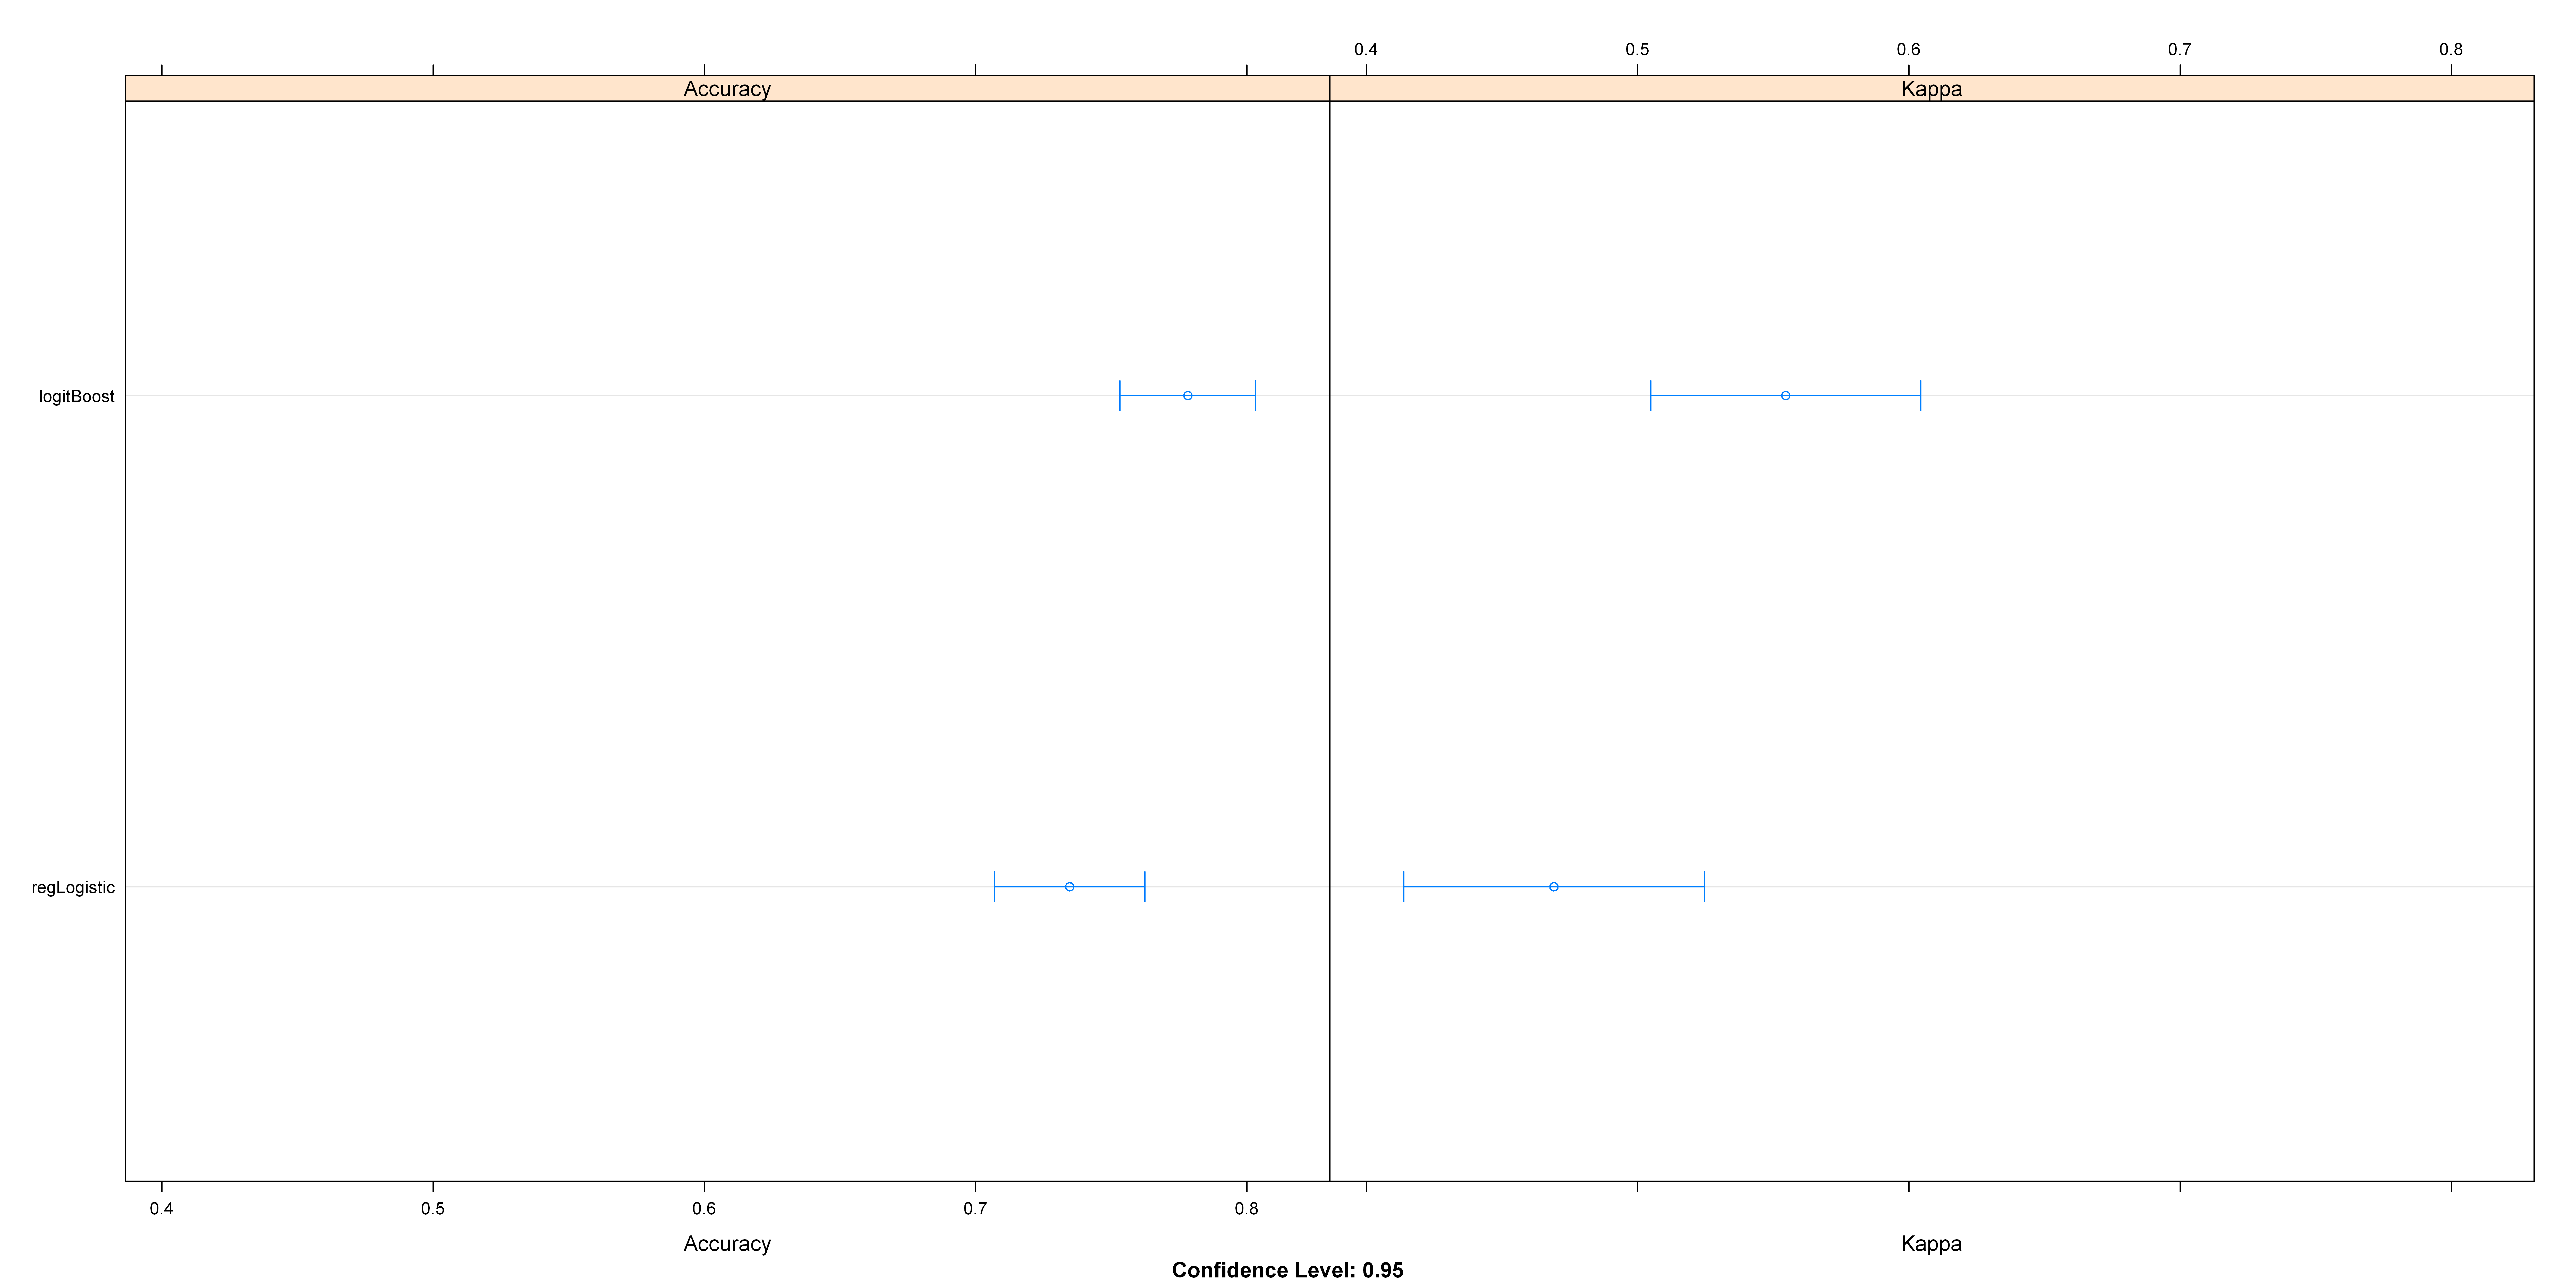

In [13]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [14]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      54      34
   NotFast   20     152
                                        
               Accuracy : 0.7923        
                 95% CI : (0.7379, 0.84)
    No Information Rate : 0.7154        
    P-Value [Acc > NIR] : 0.002958      
                                        
                  Kappa : 0.5175        
                                        
 Mcnemar's Test P-Value : 0.076881      
                                        
            Sensitivity : 0.7297        
            Specificity : 0.8172        
         Pos Pred Value : 0.6136        
         Neg Pred Value : 0.8837        
             Prevalence : 0.2846        
         Detection Rate : 0.2077        
   Detection Prevalence : 0.3385        
      Balanced Accuracy : 0.7735        
                                        
       'Positive' Class : fast          
                                        

Sensitivity          Specificity       Pos Pred Value 
           0.7297297            0.8172043            0.6136364 
      Neg Pred Value            Precision               Recall 
           0.8837209            0.6136364            0.7297297 
                  F1           Prevalence       Detection Rate 
           0.6666667            0.2846154            0.2076923 
Detection Prevalence    Balanced Accuracy 
           0.3384615            0.7734670

In [15]:
pred_regLogistic <- predict(model_regLogistic,test)  
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      97      49
   NotFast   72     201
                                          
               Accuracy : 0.7112          
                 95% CI : (0.6652, 0.7542)
    No Information Rate : 0.5967          
    P-Value [Acc > NIR] : 7.022e-07       
                                          
                  Kappa : 0.3865          
                                          
 Mcnemar's Test P-Value : 0.0455          
                                          
            Sensitivity : 0.5740          
            Specificity : 0.8040          
         Pos Pred Value : 0.6644          
         Neg Pred Value : 0.7363          
             Prevalence : 0.4033          
         Detection Rate : 0.2315          
   Detection Prevalence : 0.3484          
      Balanced Accuracy : 0.6890          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.5739645            0.8040000            0.6643836 
      Neg Pred Value            Precision               Recall 
           0.7362637            0.6643836            0.5739645 
                  F1           Prevalence       Detection Rate 
           0.6158730            0.4033413            0.2315036 
Detection Prevalence    Balanced Accuracy 
           0.3484487            0.6889822

direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



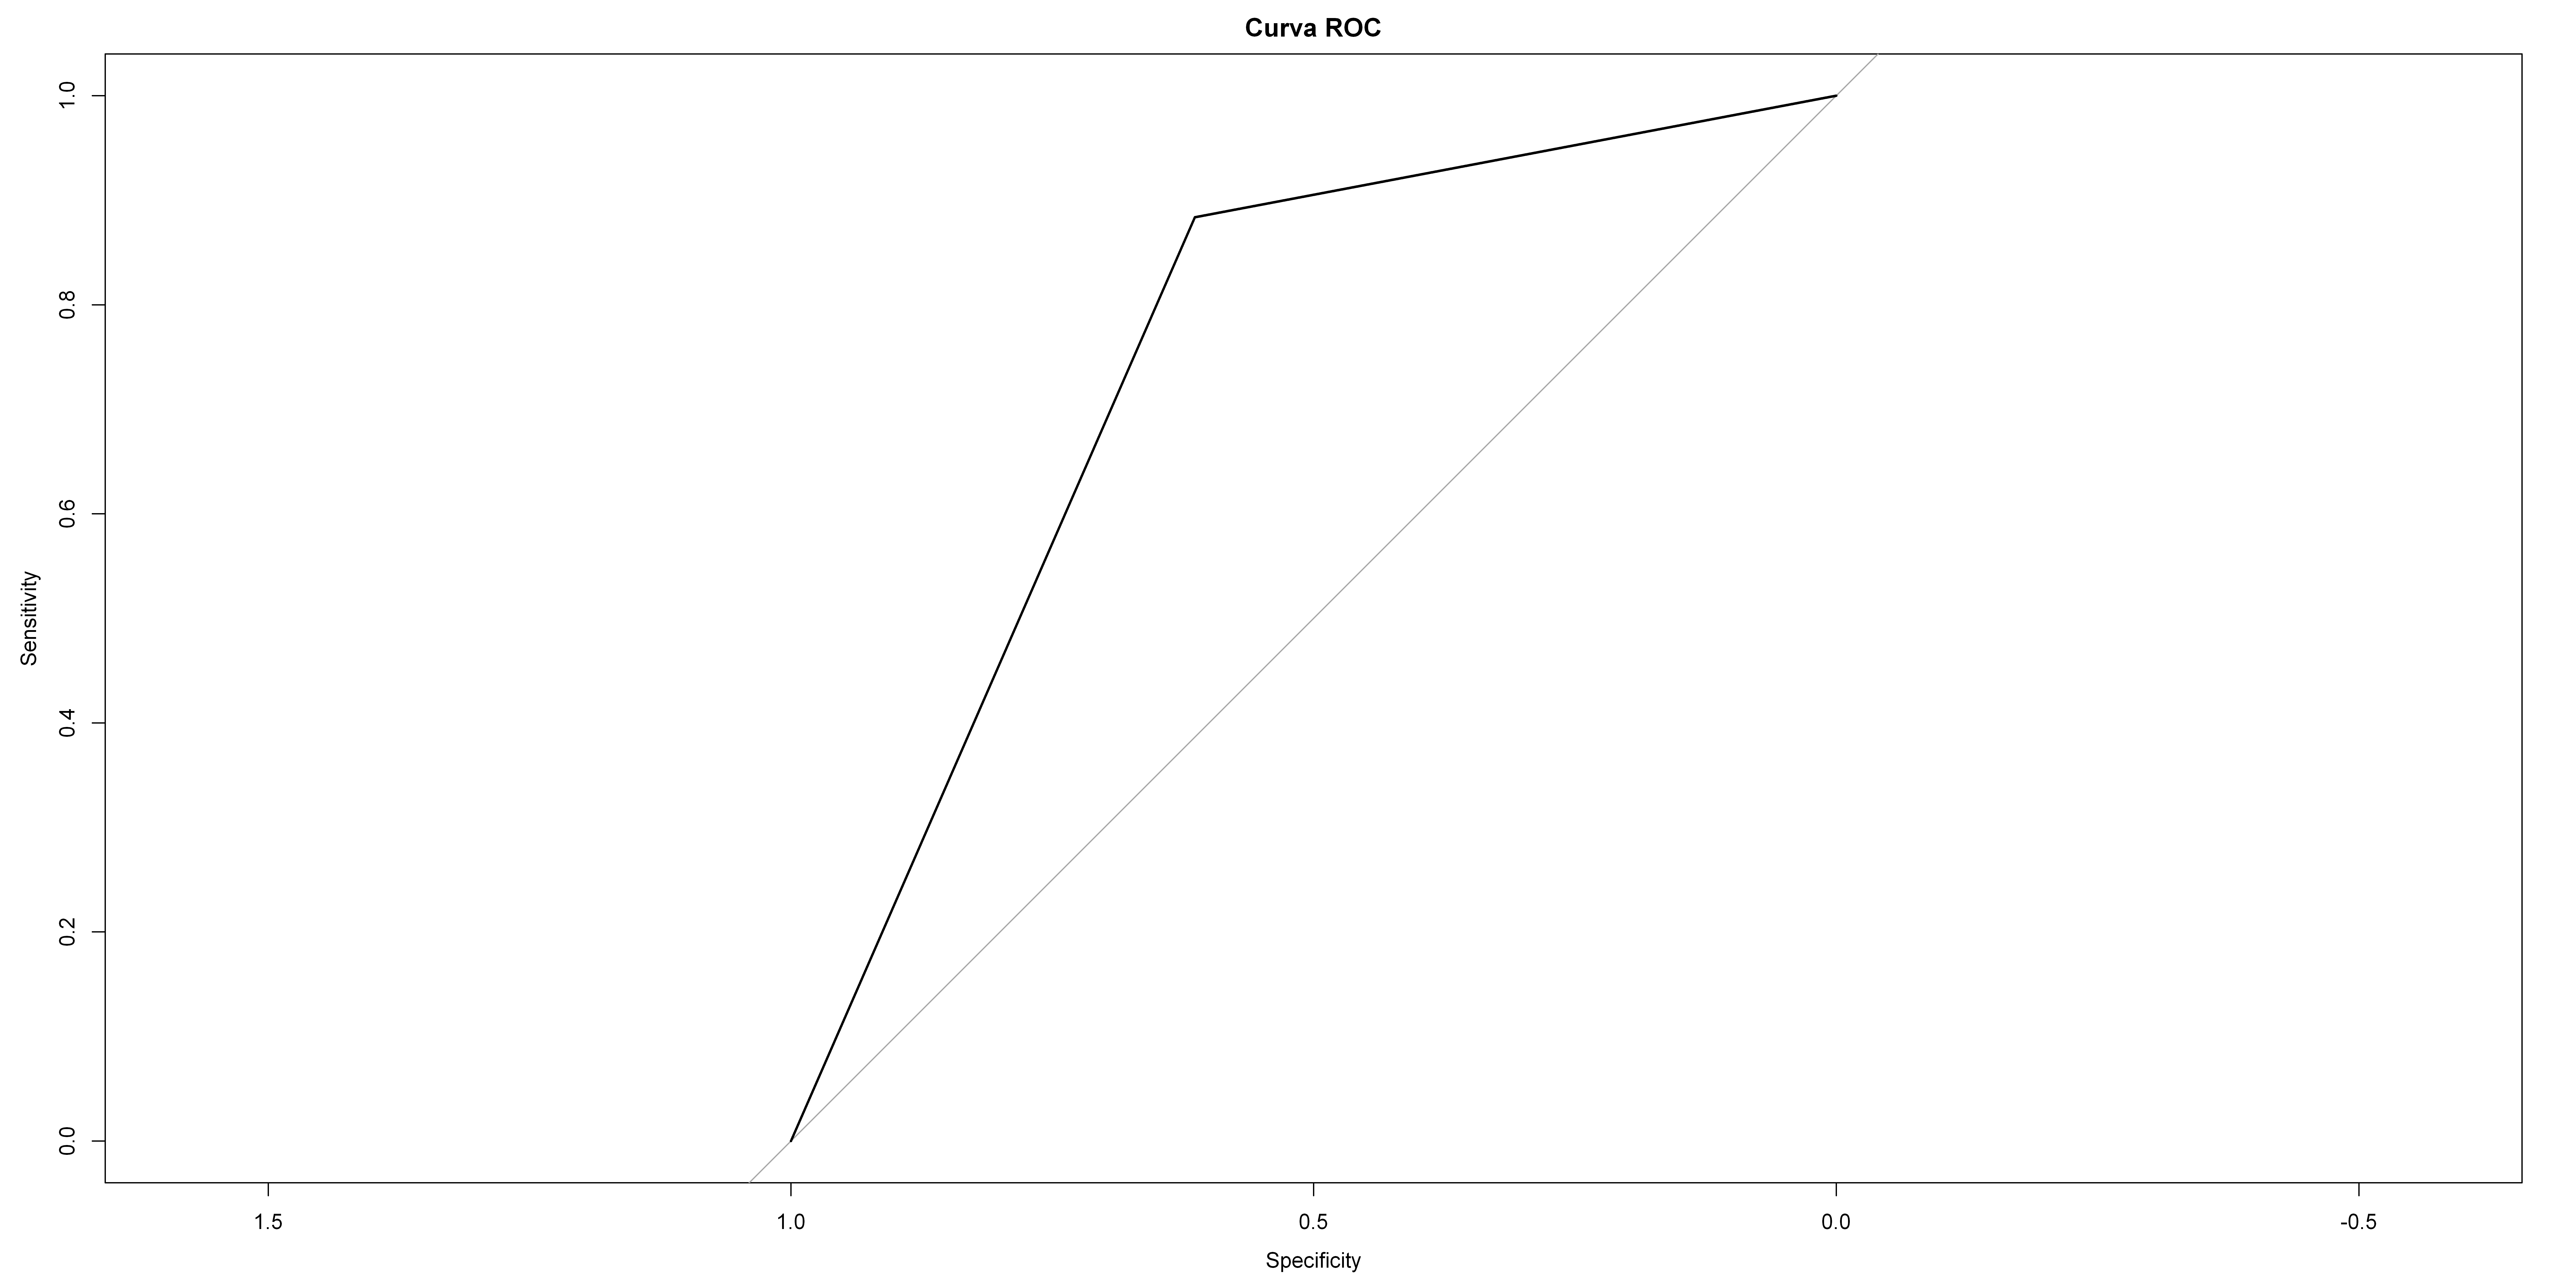

In [16]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [17]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 88 controls (TestClasses fast) < 172 cases (TestClasses NotFast).
Area under the curve: 0.7487

In [18]:
pred_logitBoost.prob

fast,NotFast
0.88079708,0.1192029
0.11920292,0.8807971
0.01798621,0.9820138
0.50000000,0.5000000
0.11920292,0.8807971
0.50000000,0.5000000
0.01798621,0.9820138
0.11920292,0.8807971
0.11920292,0.8807971
0.01798621,0.9820138


# Regressione logistica con variabili boruta

In [51]:
df_boruta <- subset(df, select=c(centreCode, degenzaPreTra, presentRefractAscites, nutritStatus, albumInfusOver7Days,
                                 ratioPaO2FiO2, platCountTranspl, albumina, surgeryDuration, IntraoperativTransfected,
                                 plasmaFresco, plasmaPools, CRIOprecipitated, CristalloidiComp, Albumina50Comp,
                                 noradrenalineEndSurger, intermedLactates, syndromeReperfus, abdomOpenEndSurg,
                                 organDonorDrawalSodiemia, realMELDNa, comorbidities_none_RIC, new_admWard, EPScum,deg_cat))

In [52]:


sample <- sample.split(df_boruta$deg_cat, SplitRatio = 0.7)
train  <- subset(df_boruta, sample == TRUE)
test   <- subset(df_boruta, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [53]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    488     488 

In [54]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [55]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)  

+ Fold01.Rep1: cost=14.172422, loss=L1, epsilon=1 
- Fold01.Rep1: cost=14.172422, loss=L1, epsilon=1 
+ Fold01.Rep1: cost= 0.001307, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost= 0.001307, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost= 0.002453, loss=L1, epsilon=1 
- Fold01.Rep1: cost= 0.002453, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=14.172422, loss=L1, epsilon=1 
- Fold02.Rep1: cost=14.172422, loss=L1, epsilon=1 
+ Fold02.Rep1: cost= 0.001307, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost= 0.001307, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost= 0.002453, loss=L1, epsilon=1 
- Fold02.Rep1: cost= 0.002453, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=14.172422, loss=L1, epsilon=1 
- Fold03.Rep1: cost=14.172422, loss=L1, epsilon=1 
+ Fold03.Rep1: cost= 0.001307, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost= 0.001307, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost= 0.002453, loss=L1, epsilon=1 
- Fold03.Rep1: cost= 0.002453, loss=L1, epsilon=1 
+ Fold04.Rep1: cost=14.172422, loss=L1, epsilon=1 
-

In [56]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 


+ Fold01.Rep1: nIter=81 
- Fold01.Rep1: nIter=81 
+ Fold02.Rep1: nIter=81 
- Fold02.Rep1: nIter=81 
+ Fold03.Rep1: nIter=81 
- Fold03.Rep1: nIter=81 
+ Fold04.Rep1: nIter=81 
- Fold04.Rep1: nIter=81 
+ Fold05.Rep1: nIter=81 
- Fold05.Rep1: nIter=81 
+ Fold06.Rep1: nIter=81 
- Fold06.Rep1: nIter=81 
+ Fold07.Rep1: nIter=81 
- Fold07.Rep1: nIter=81 
+ Fold08.Rep1: nIter=81 
- Fold08.Rep1: nIter=81 
+ Fold09.Rep1: nIter=81 
- Fold09.Rep1: nIter=81 
+ Fold10.Rep1: nIter=81 
- Fold10.Rep1: nIter=81 
Aggregating results
Selecting tuning parameters
Fitting nIter = 22 on full training set


Regularized Logistic Regression 

976 samples
 24 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 879, 878, 878, 879, 878, 878, ... 
Resampling results across tuning parameters:

  cost          loss     Accuracy   Kappa    
   0.001306971  L2_dual  0.7336314  0.4673392
   0.002453431  L1       0.5000000  0.0000000
  14.172421868  L1       0.7285714  0.4569929

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.001306971, loss = L2_dual
 and epsilon = 1.


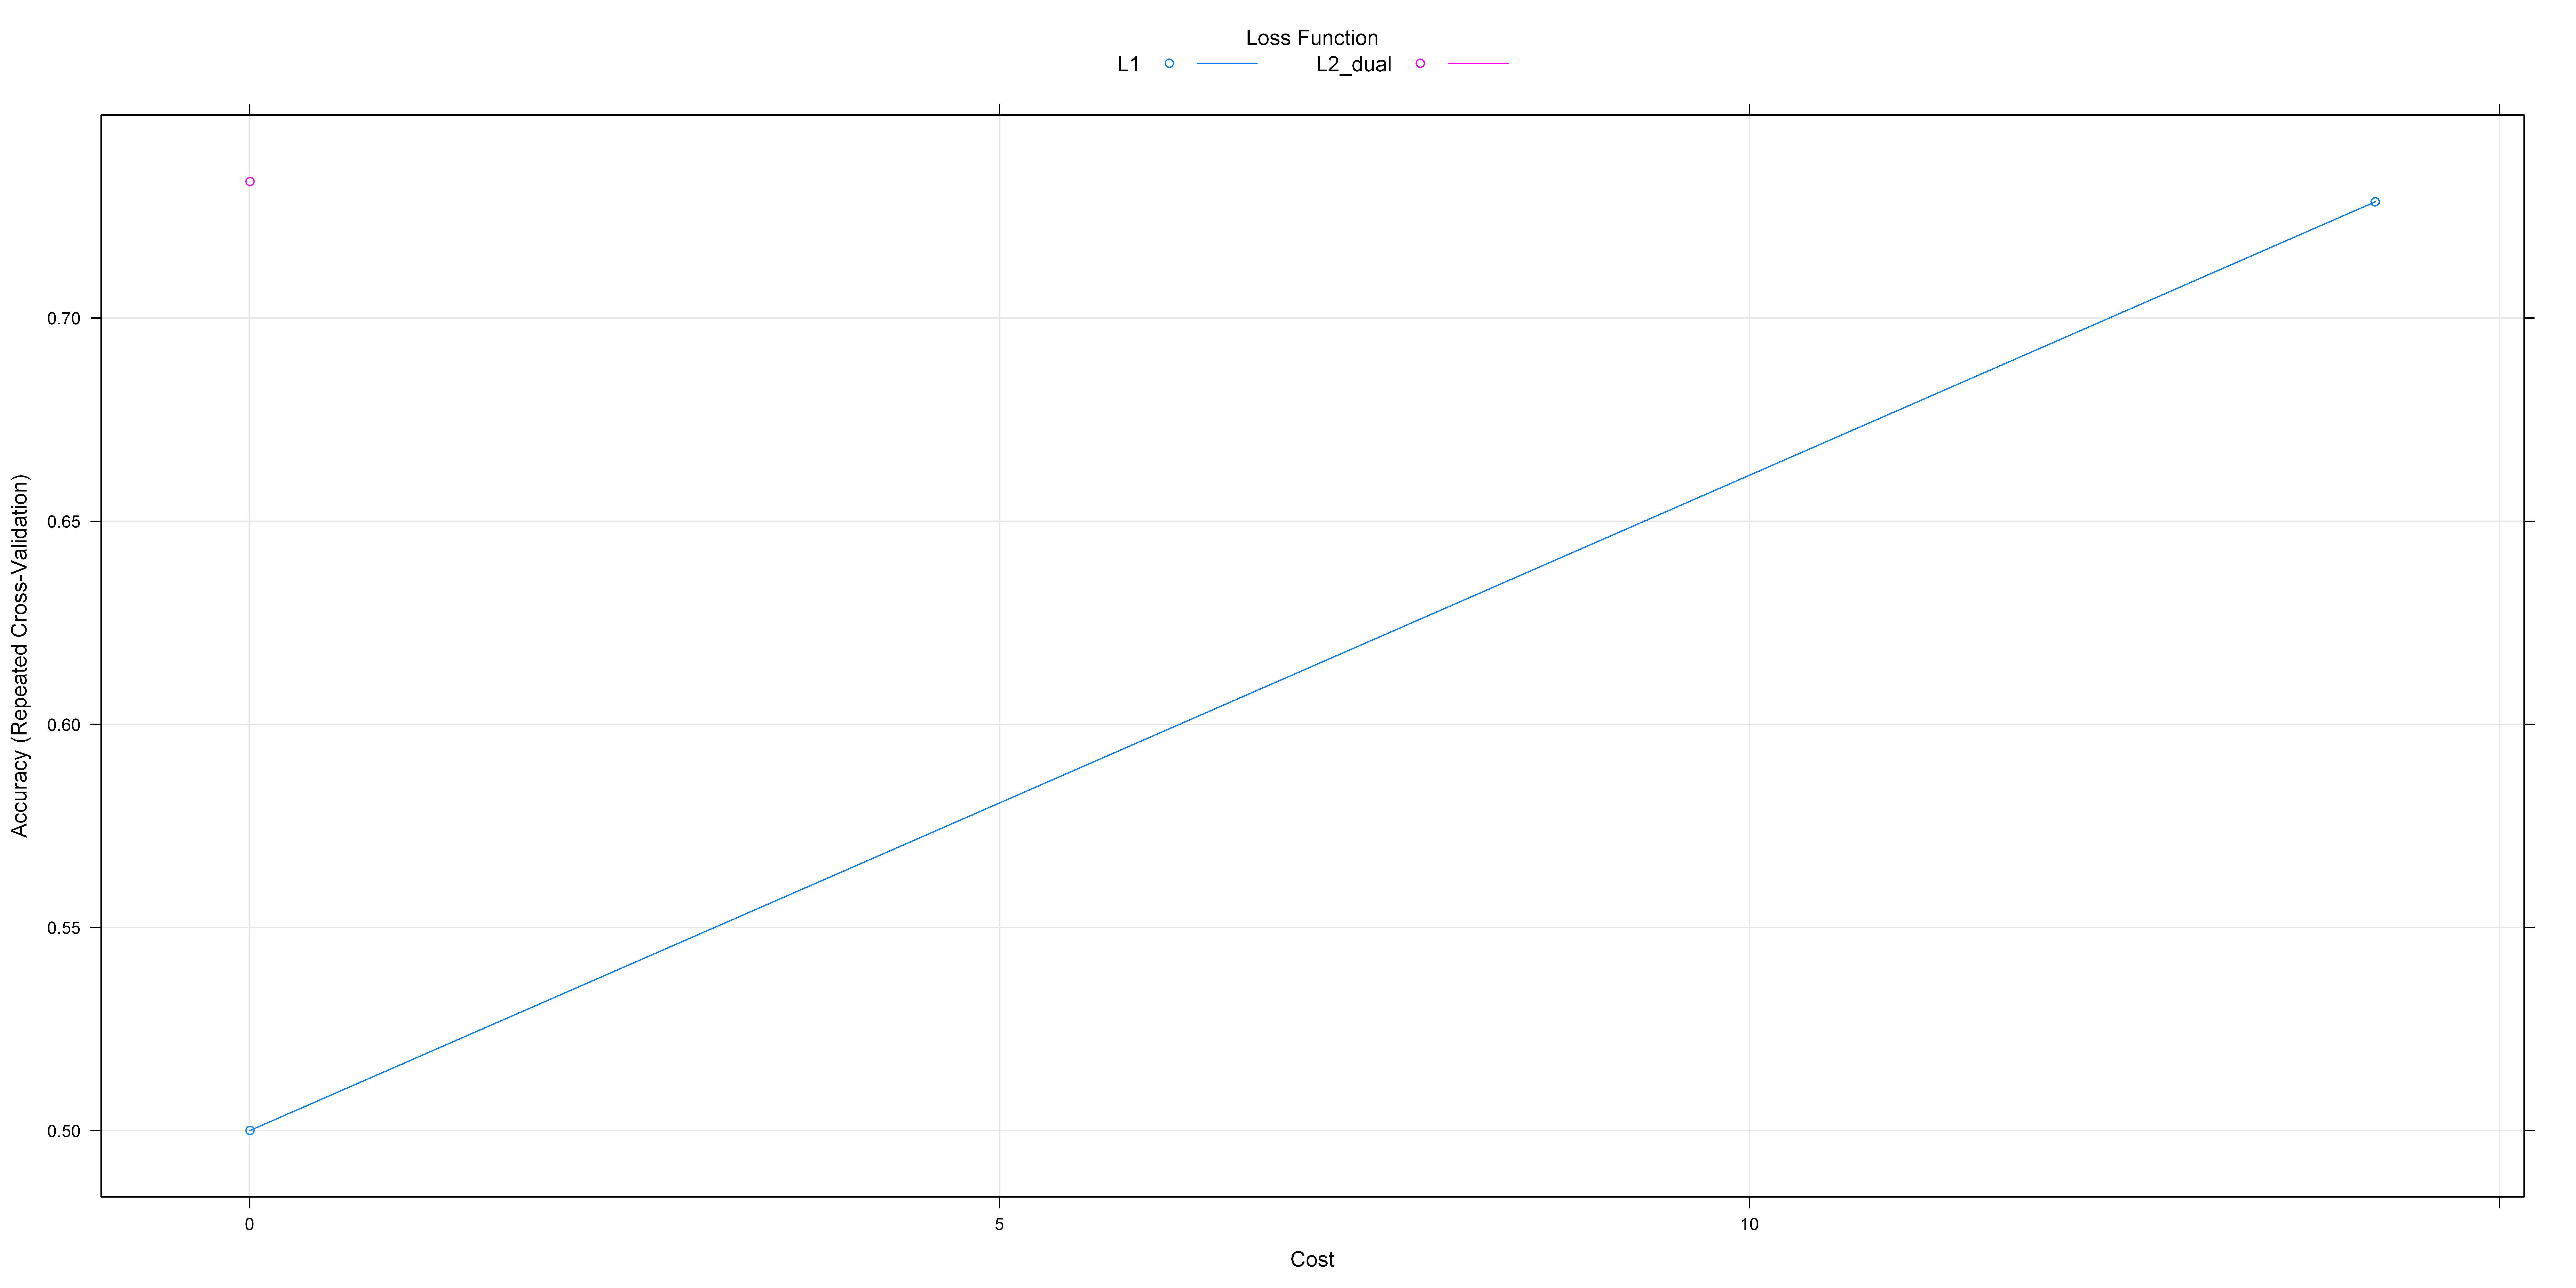

In [57]:
print(model_regLogistic)
plot(model_regLogistic)

Boosted Logistic Regression 

976 samples
 24 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 878, 879, 878, 878, 878, 879, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  15     0.7040080  0.4081184
  22     0.7780175  0.5550955
  81     0.6977909  0.3956662

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 22.


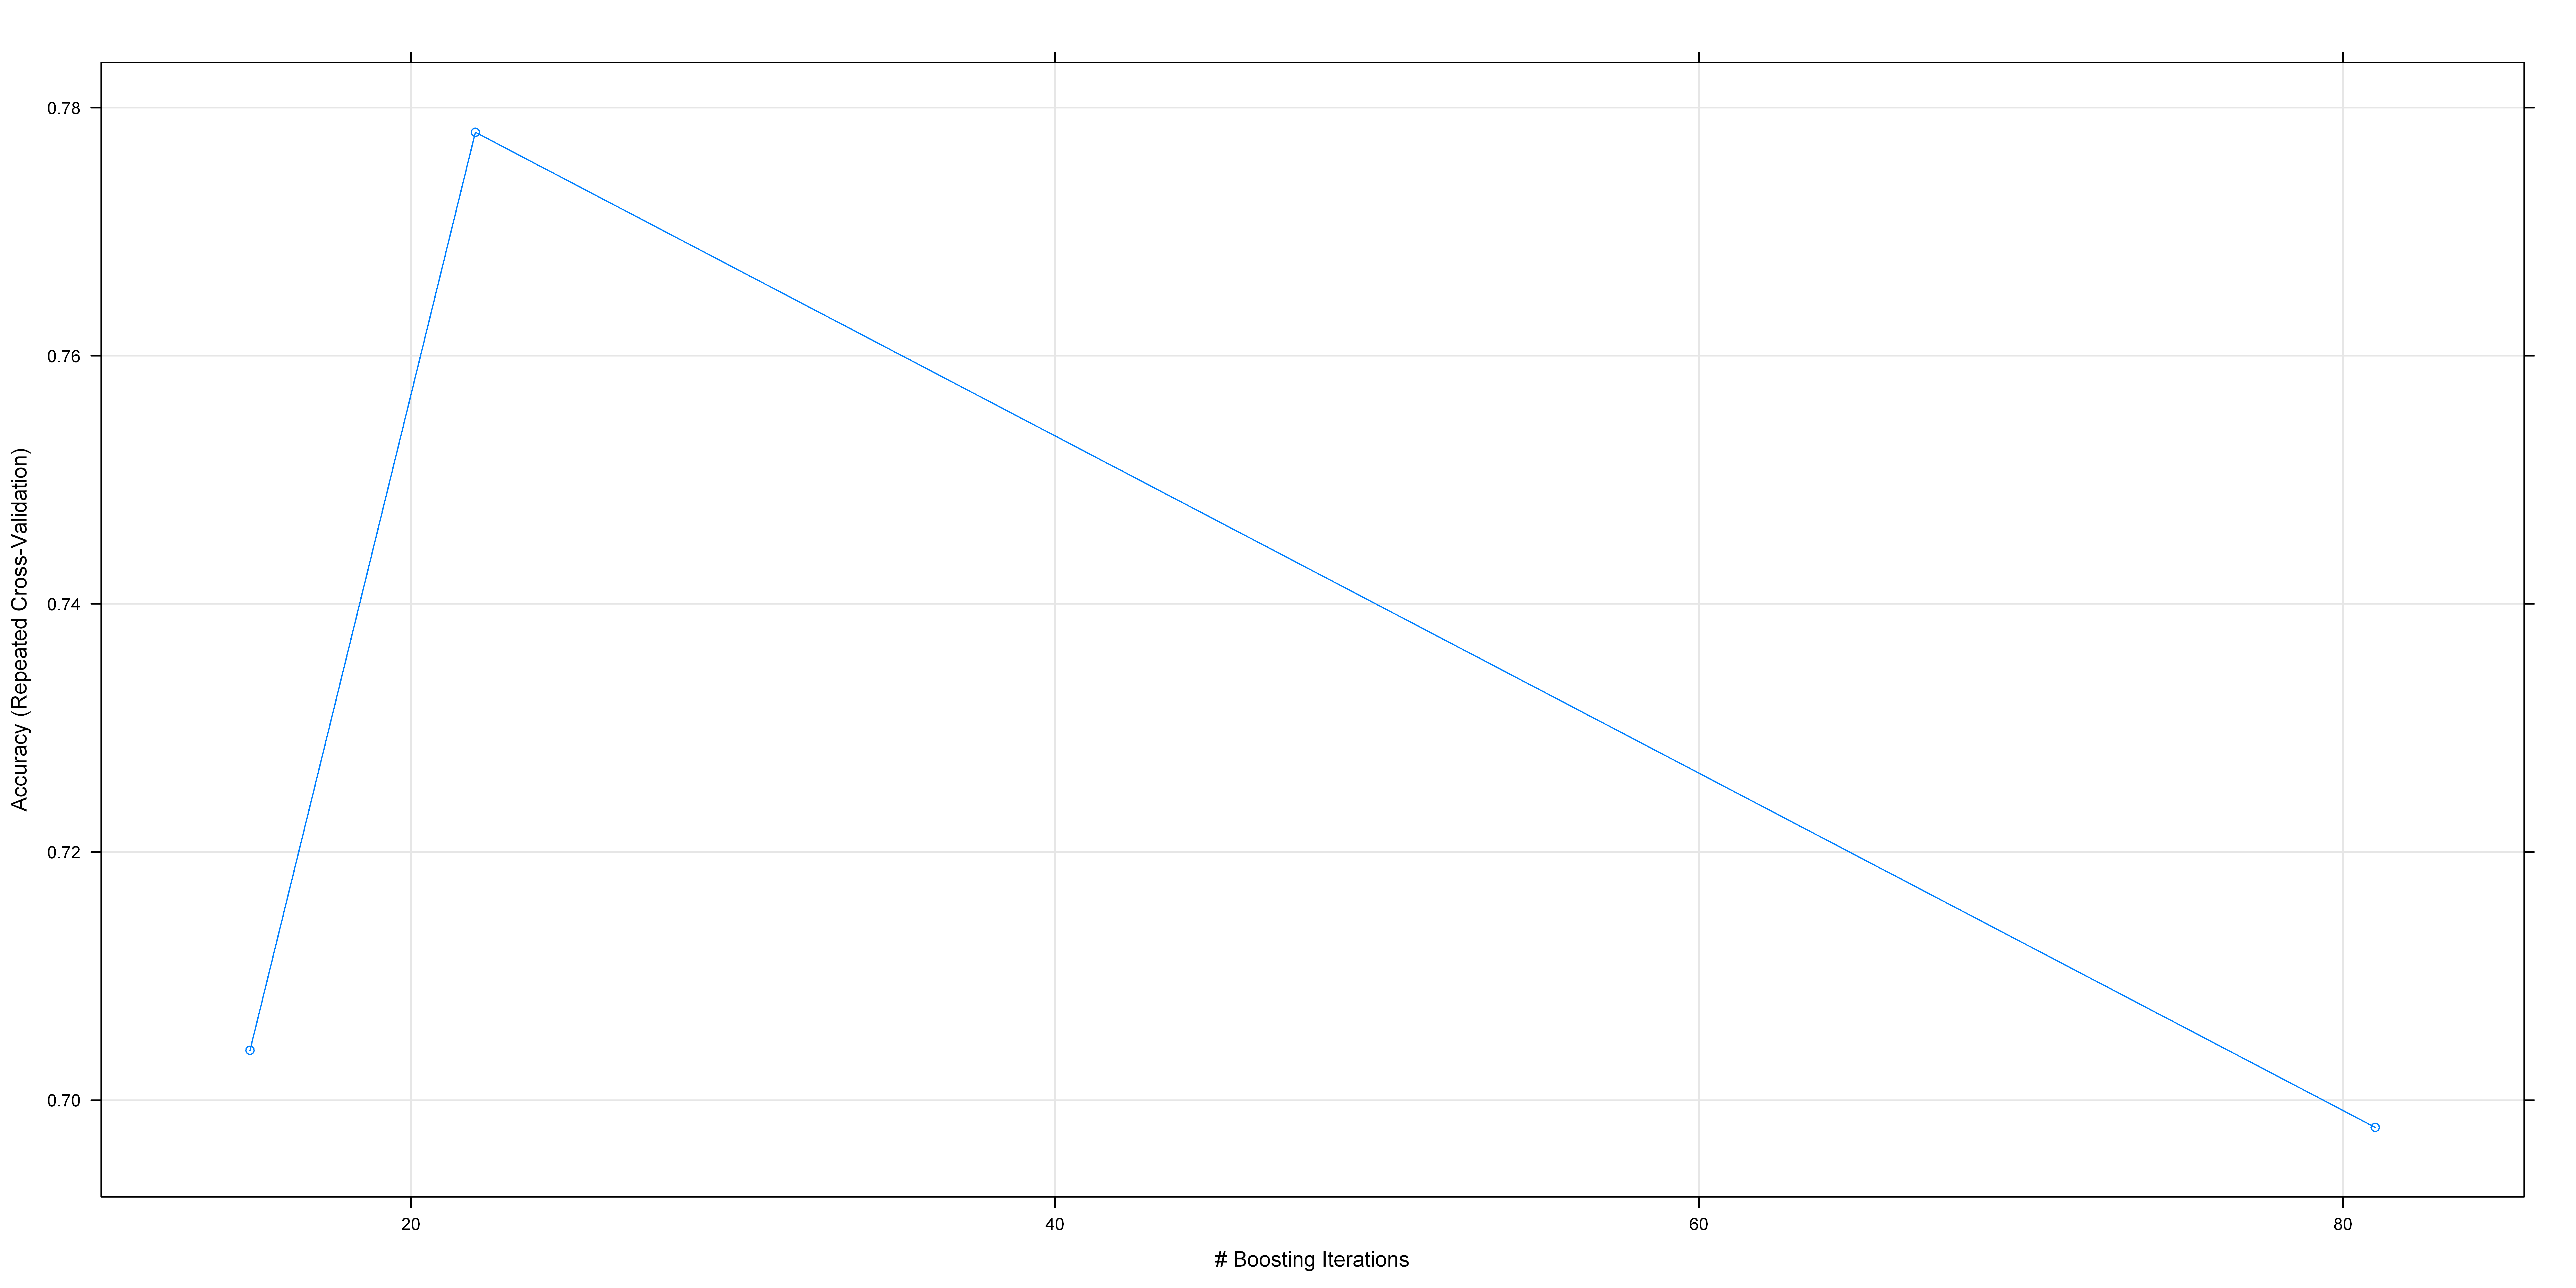

In [58]:
print(model_logitBoost)
plot(model_logitBoost)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.6307692 0.7551230 0.7929583 0.7780175 0.8221514 0.8787879    0
regLogistic 0.6122449 0.7223596 0.7448980 0.7336314 0.7680412 0.7755102    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.2578497 0.5052802 0.5867034 0.5550955 0.6438088 0.7569061    0
regLogistic 0.2244898 0.4440524 0.4897959 0.4673392 0.5356111 0.5510204    0


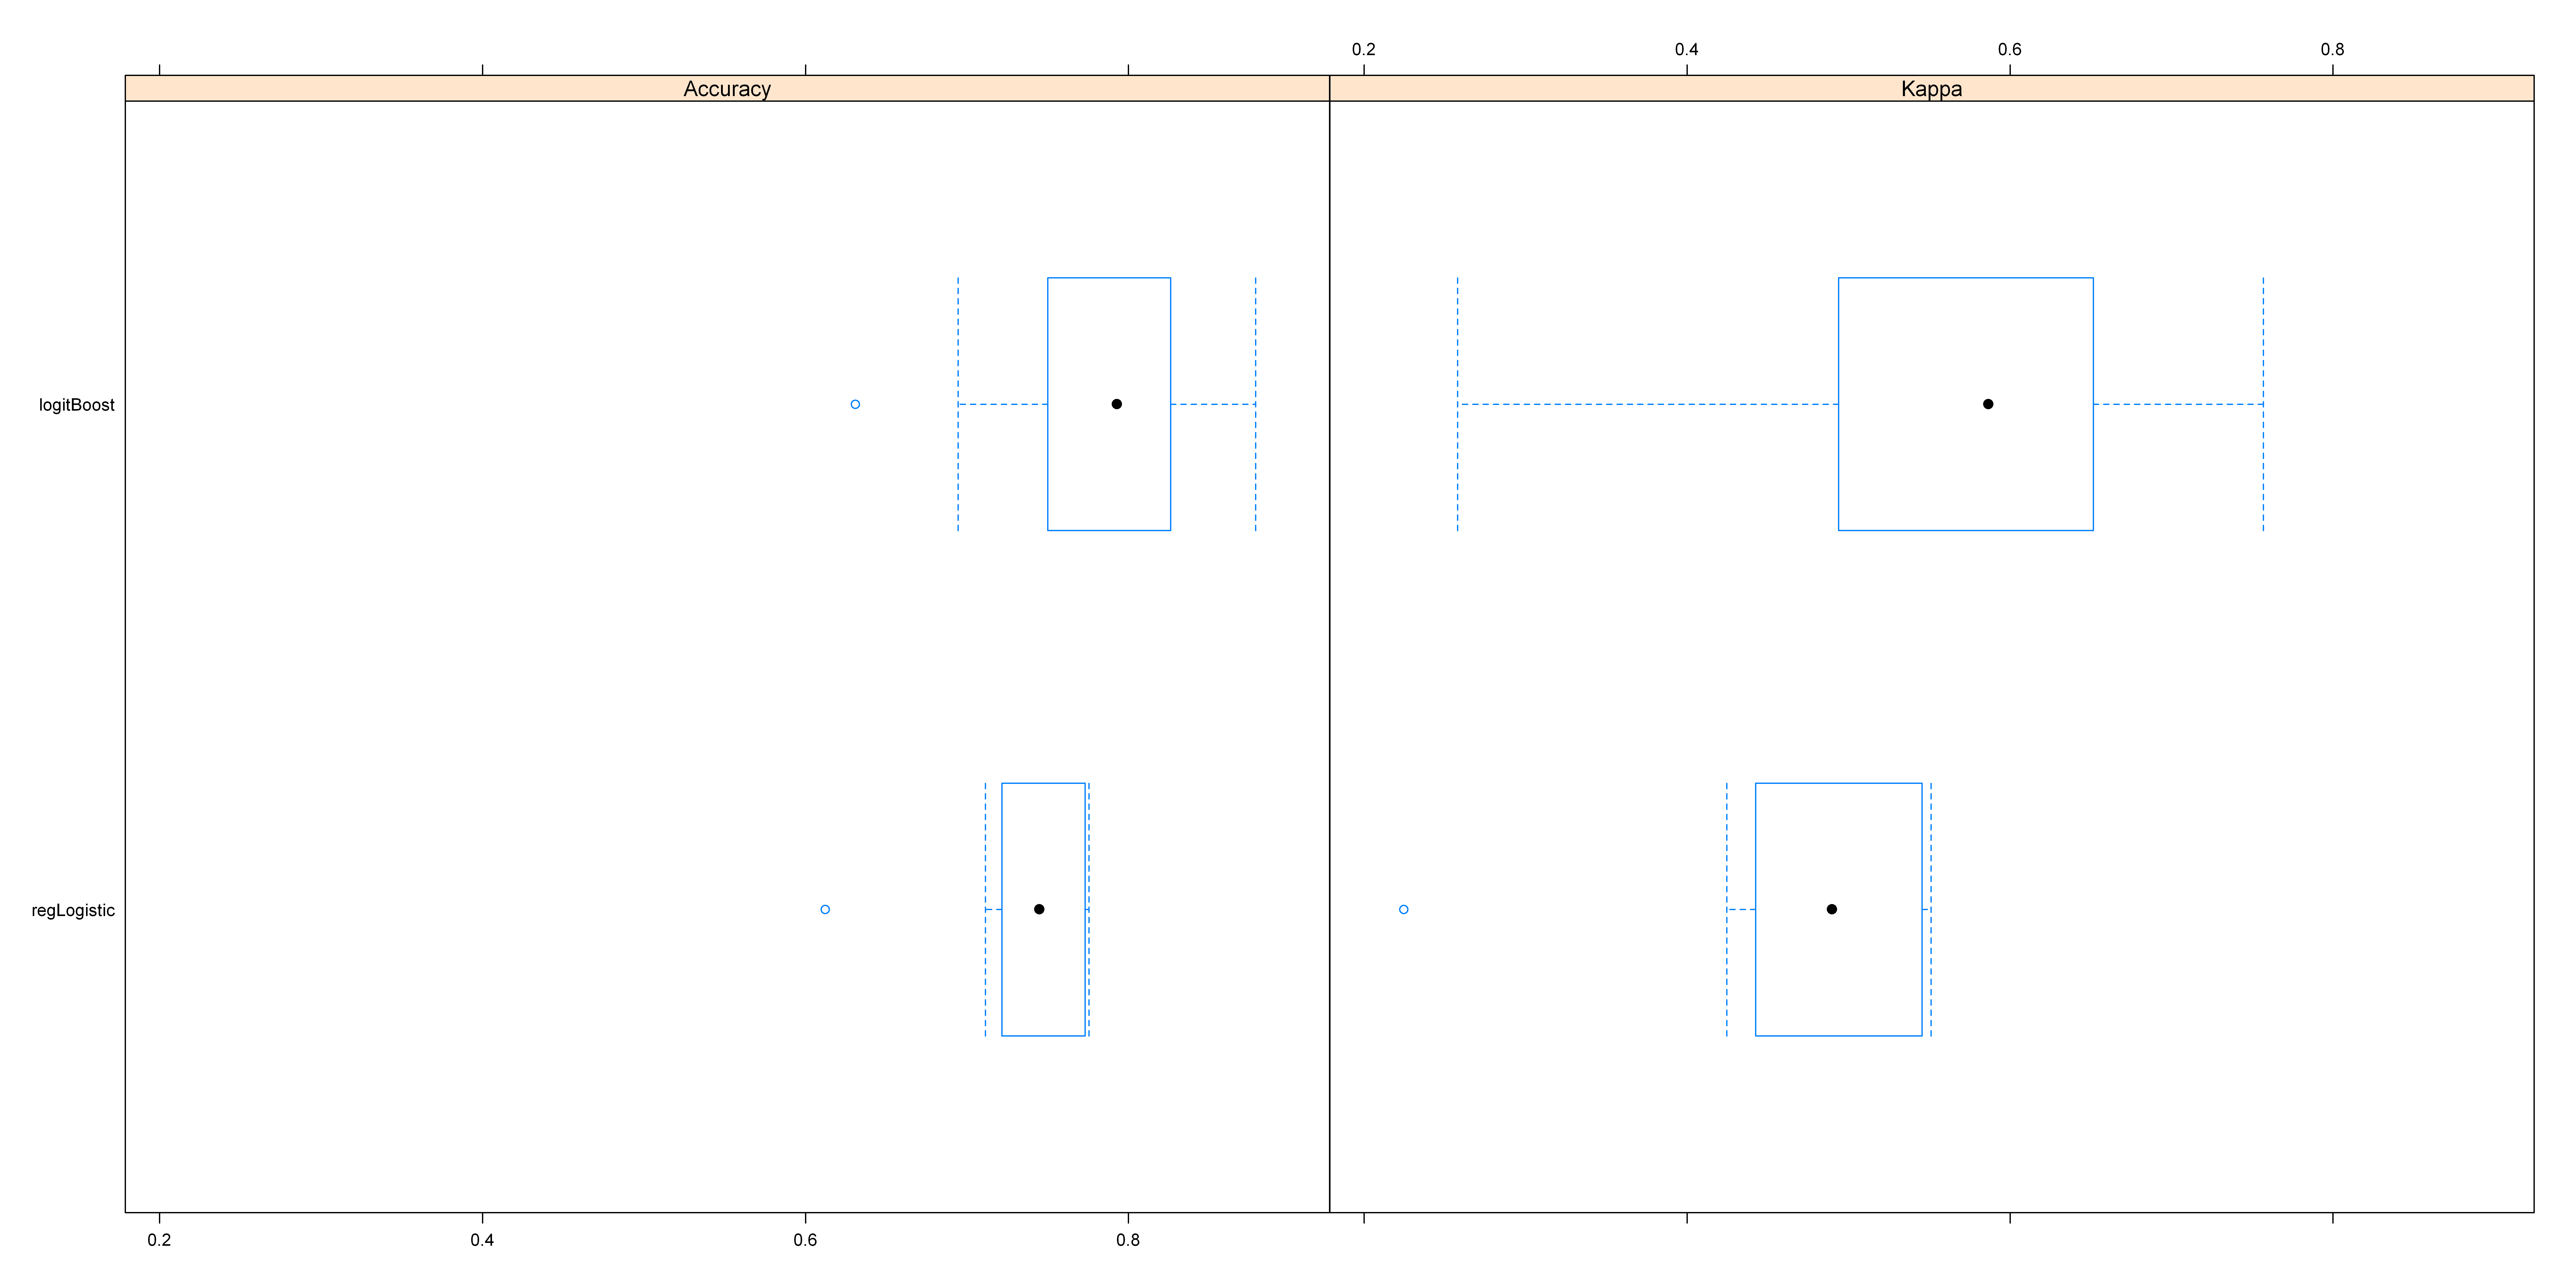

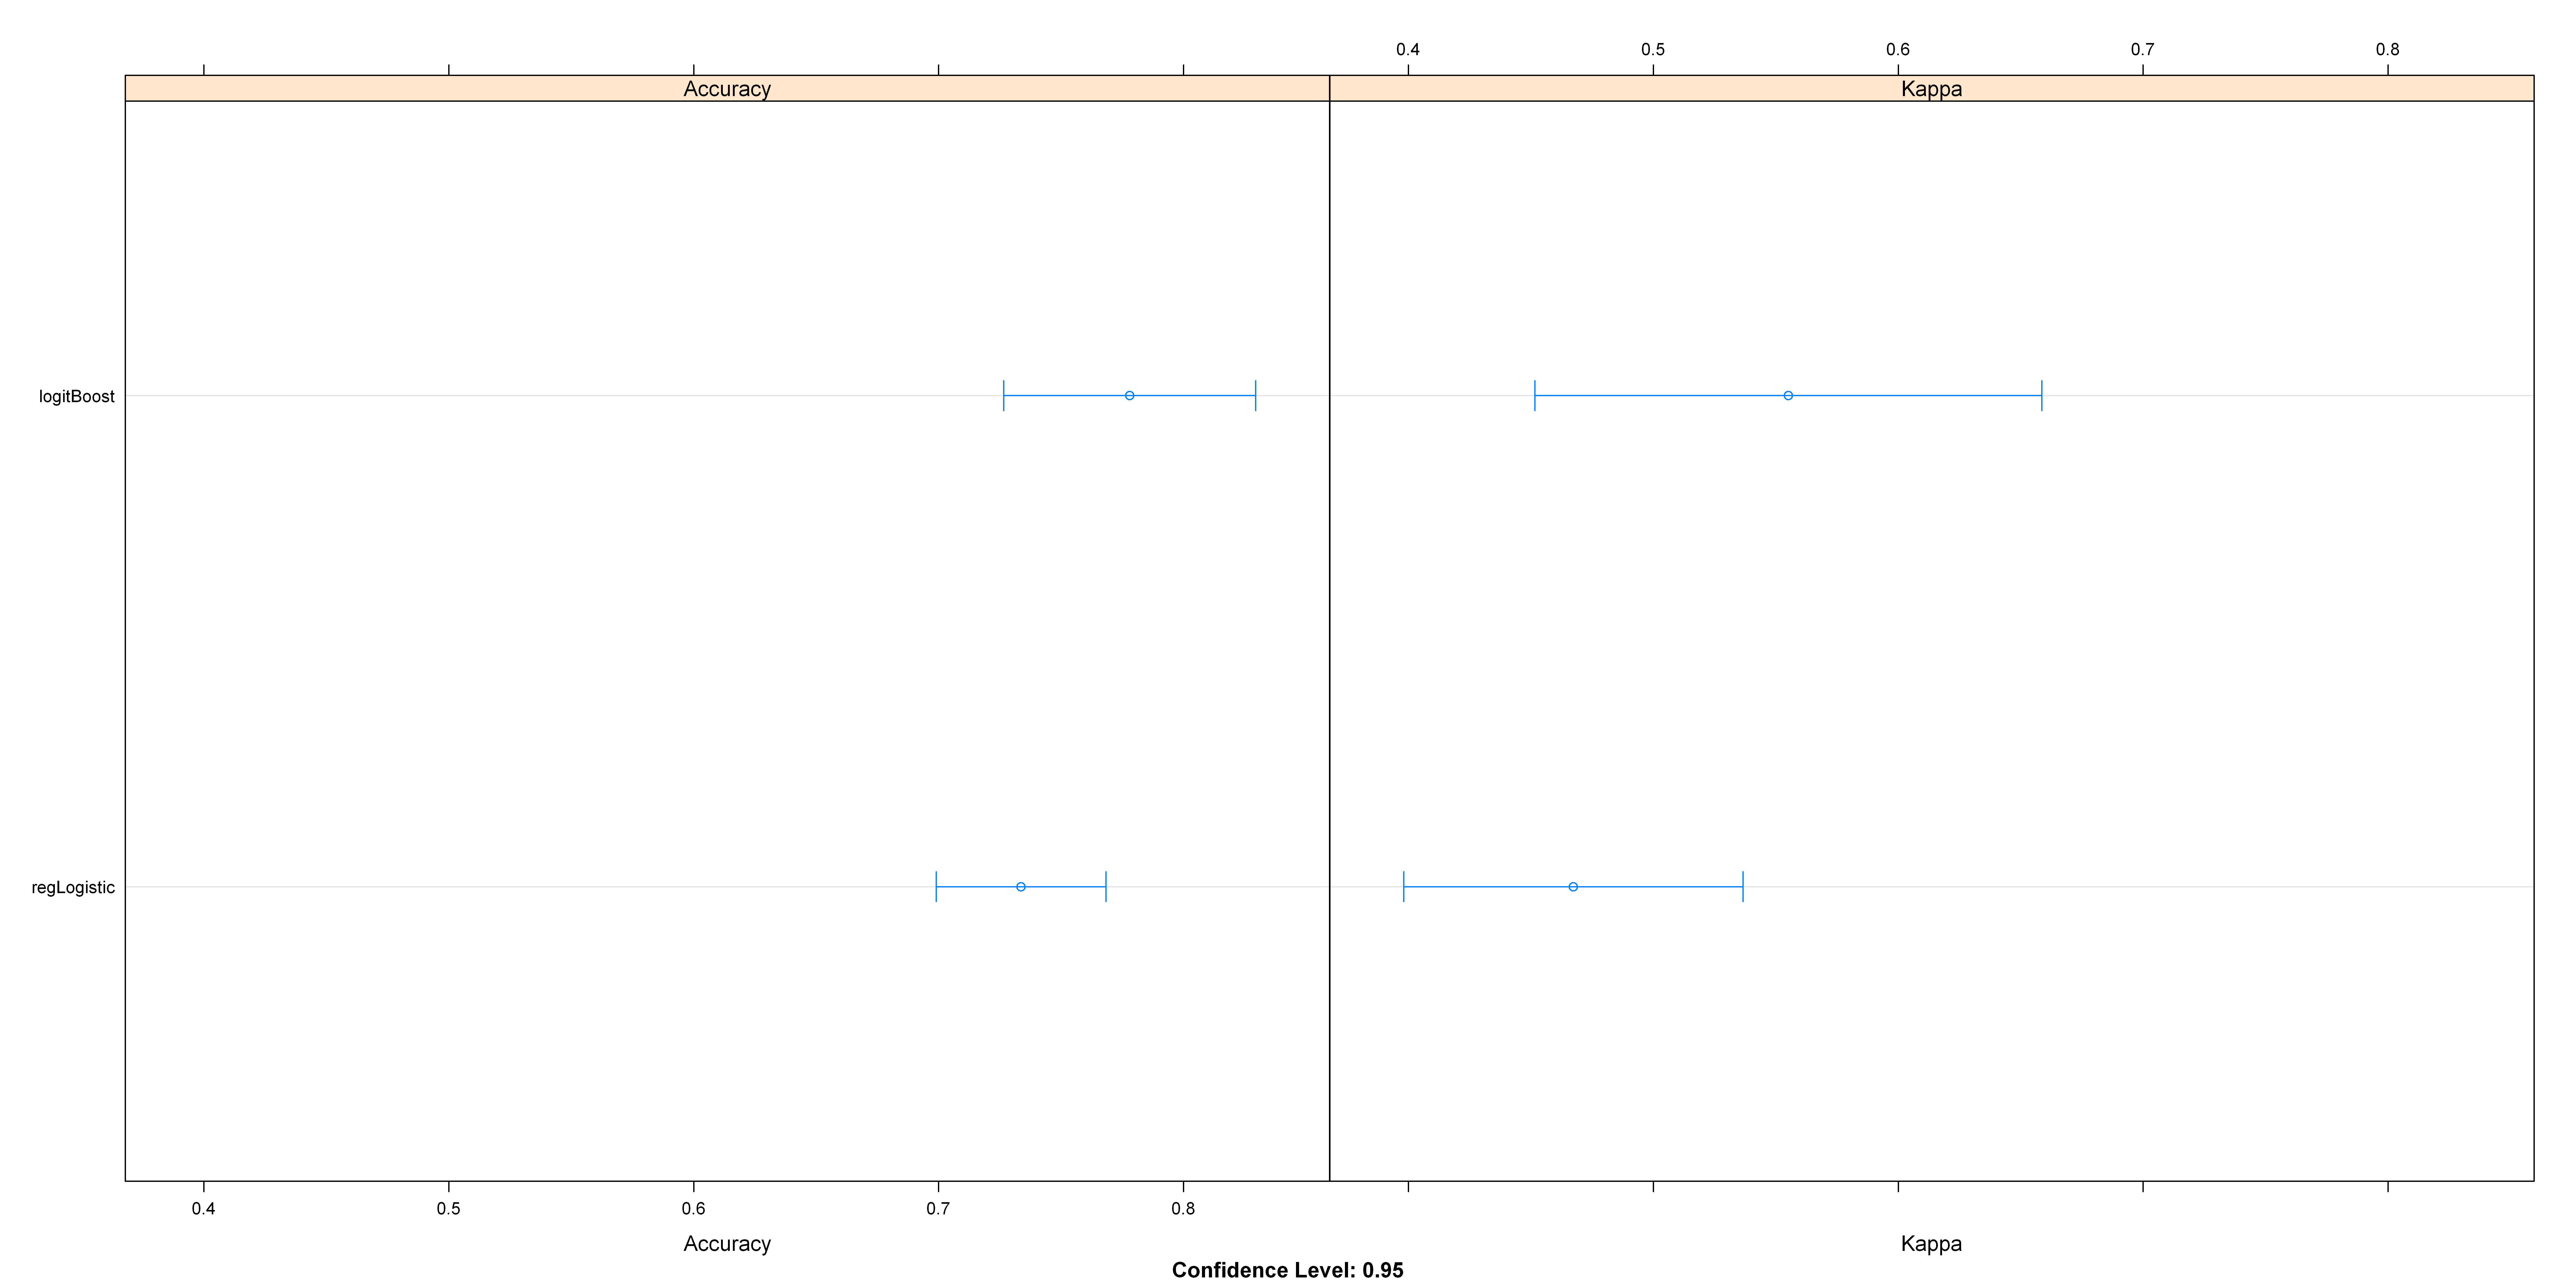

In [59]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

In [60]:
pred_logitBoost <- predict(model_logitBoost,test)   
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      80      34
   NotFast   44     157
                                          
               Accuracy : 0.7524          
                 95% CI : (0.7009, 0.7991)
    No Information Rate : 0.6063          
    P-Value [Acc > NIR] : 3.216e-08       
                                          
                  Kappa : 0.4739          
                                          
 Mcnemar's Test P-Value : 0.3082          
                                          
            Sensitivity : 0.6452          
            Specificity : 0.8220          
         Pos Pred Value : 0.7018          
         Neg Pred Value : 0.7811          
             Prevalence : 0.3937          
         Detection Rate : 0.2540          
   Detection Prevalence : 0.3619          
      Balanced Accuracy : 0.7336          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.6451613            0.8219895            0.7017544 
      Neg Pred Value            Precision               Recall 
           0.7810945            0.7017544            0.6451613 
                  F1           Prevalence       Detection Rate 
           0.6722689            0.3936508            0.2539683 
Detection Prevalence    Balanced Accuracy 
           0.3619048            0.7335754

In [69]:
table(test$deg_cat)


   fast NotFast 
    146     273 

In [61]:
pred_regLogistic <- predict(model_regLogistic,test)   
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast     112      34
   NotFast  102     171
                                          
               Accuracy : 0.6754          
                 95% CI : (0.6283, 0.7201)
    No Information Rate : 0.5107          
    P-Value [Acc > NIR] : 6.372e-12       
                                          
                  Kappa : 0.355           
                                          
 Mcnemar's Test P-Value : 9.181e-09       
                                          
            Sensitivity : 0.5234          
            Specificity : 0.8341          
         Pos Pred Value : 0.7671          
         Neg Pred Value : 0.6264          
             Prevalence : 0.5107          
         Detection Rate : 0.2673          
   Detection Prevalence : 0.3484          
      Balanced Accuracy : 0.6788          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.5233645            0.8341463            0.7671233 
      Neg Pred Value            Precision               Recall 
           0.6263736            0.7671233            0.5233645 
                  F1           Prevalence       Detection Rate 
           0.6222222            0.5107399            0.2673031 
Detection Prevalence    Balanced Accuracy 
           0.3484487            0.6787554

In [62]:
varImp(model_regLogistic)

ROC curve variable importance

  only 20 most important variables shown (out of 24)

                         Importance
realMELDNa                  100.000
IntraoperativTransfected     81.709
centreCode                   75.708
surgeryDuration              65.259
albumina                     64.765
plasmaPools                  59.232
ratioPaO2FiO2                54.419
presentRefractAscites        51.919
intermedLactates             47.845
platCountTranspl             47.126
noradrenalineEndSurger       46.423
degenzaPreTra                44.755
new_admWard                  40.979
EPScum                       33.729
albumInfusOver7Days          28.261
syndromeReperfus             28.112
CRIOprecipitated             19.538
plasmaFresco                  9.830
CristalloidiComp              9.652
nutritStatus                  9.272

In [63]:
varImp(model_logitBoost)

ROC curve variable importance

  only 20 most important variables shown (out of 24)

                         Importance
realMELDNa                  100.000
IntraoperativTransfected     81.709
centreCode                   75.708
surgeryDuration              65.259
albumina                     64.765
plasmaPools                  59.232
ratioPaO2FiO2                54.419
presentRefractAscites        51.919
intermedLactates             47.845
platCountTranspl             47.126
noradrenalineEndSurger       46.423
degenzaPreTra                44.755
new_admWard                  40.979
EPScum                       33.729
albumInfusOver7Days          28.261
syndromeReperfus             28.112
CRIOprecipitated             19.538
plasmaFresco                  9.830
CristalloidiComp              9.652
nutritStatus                  9.272

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



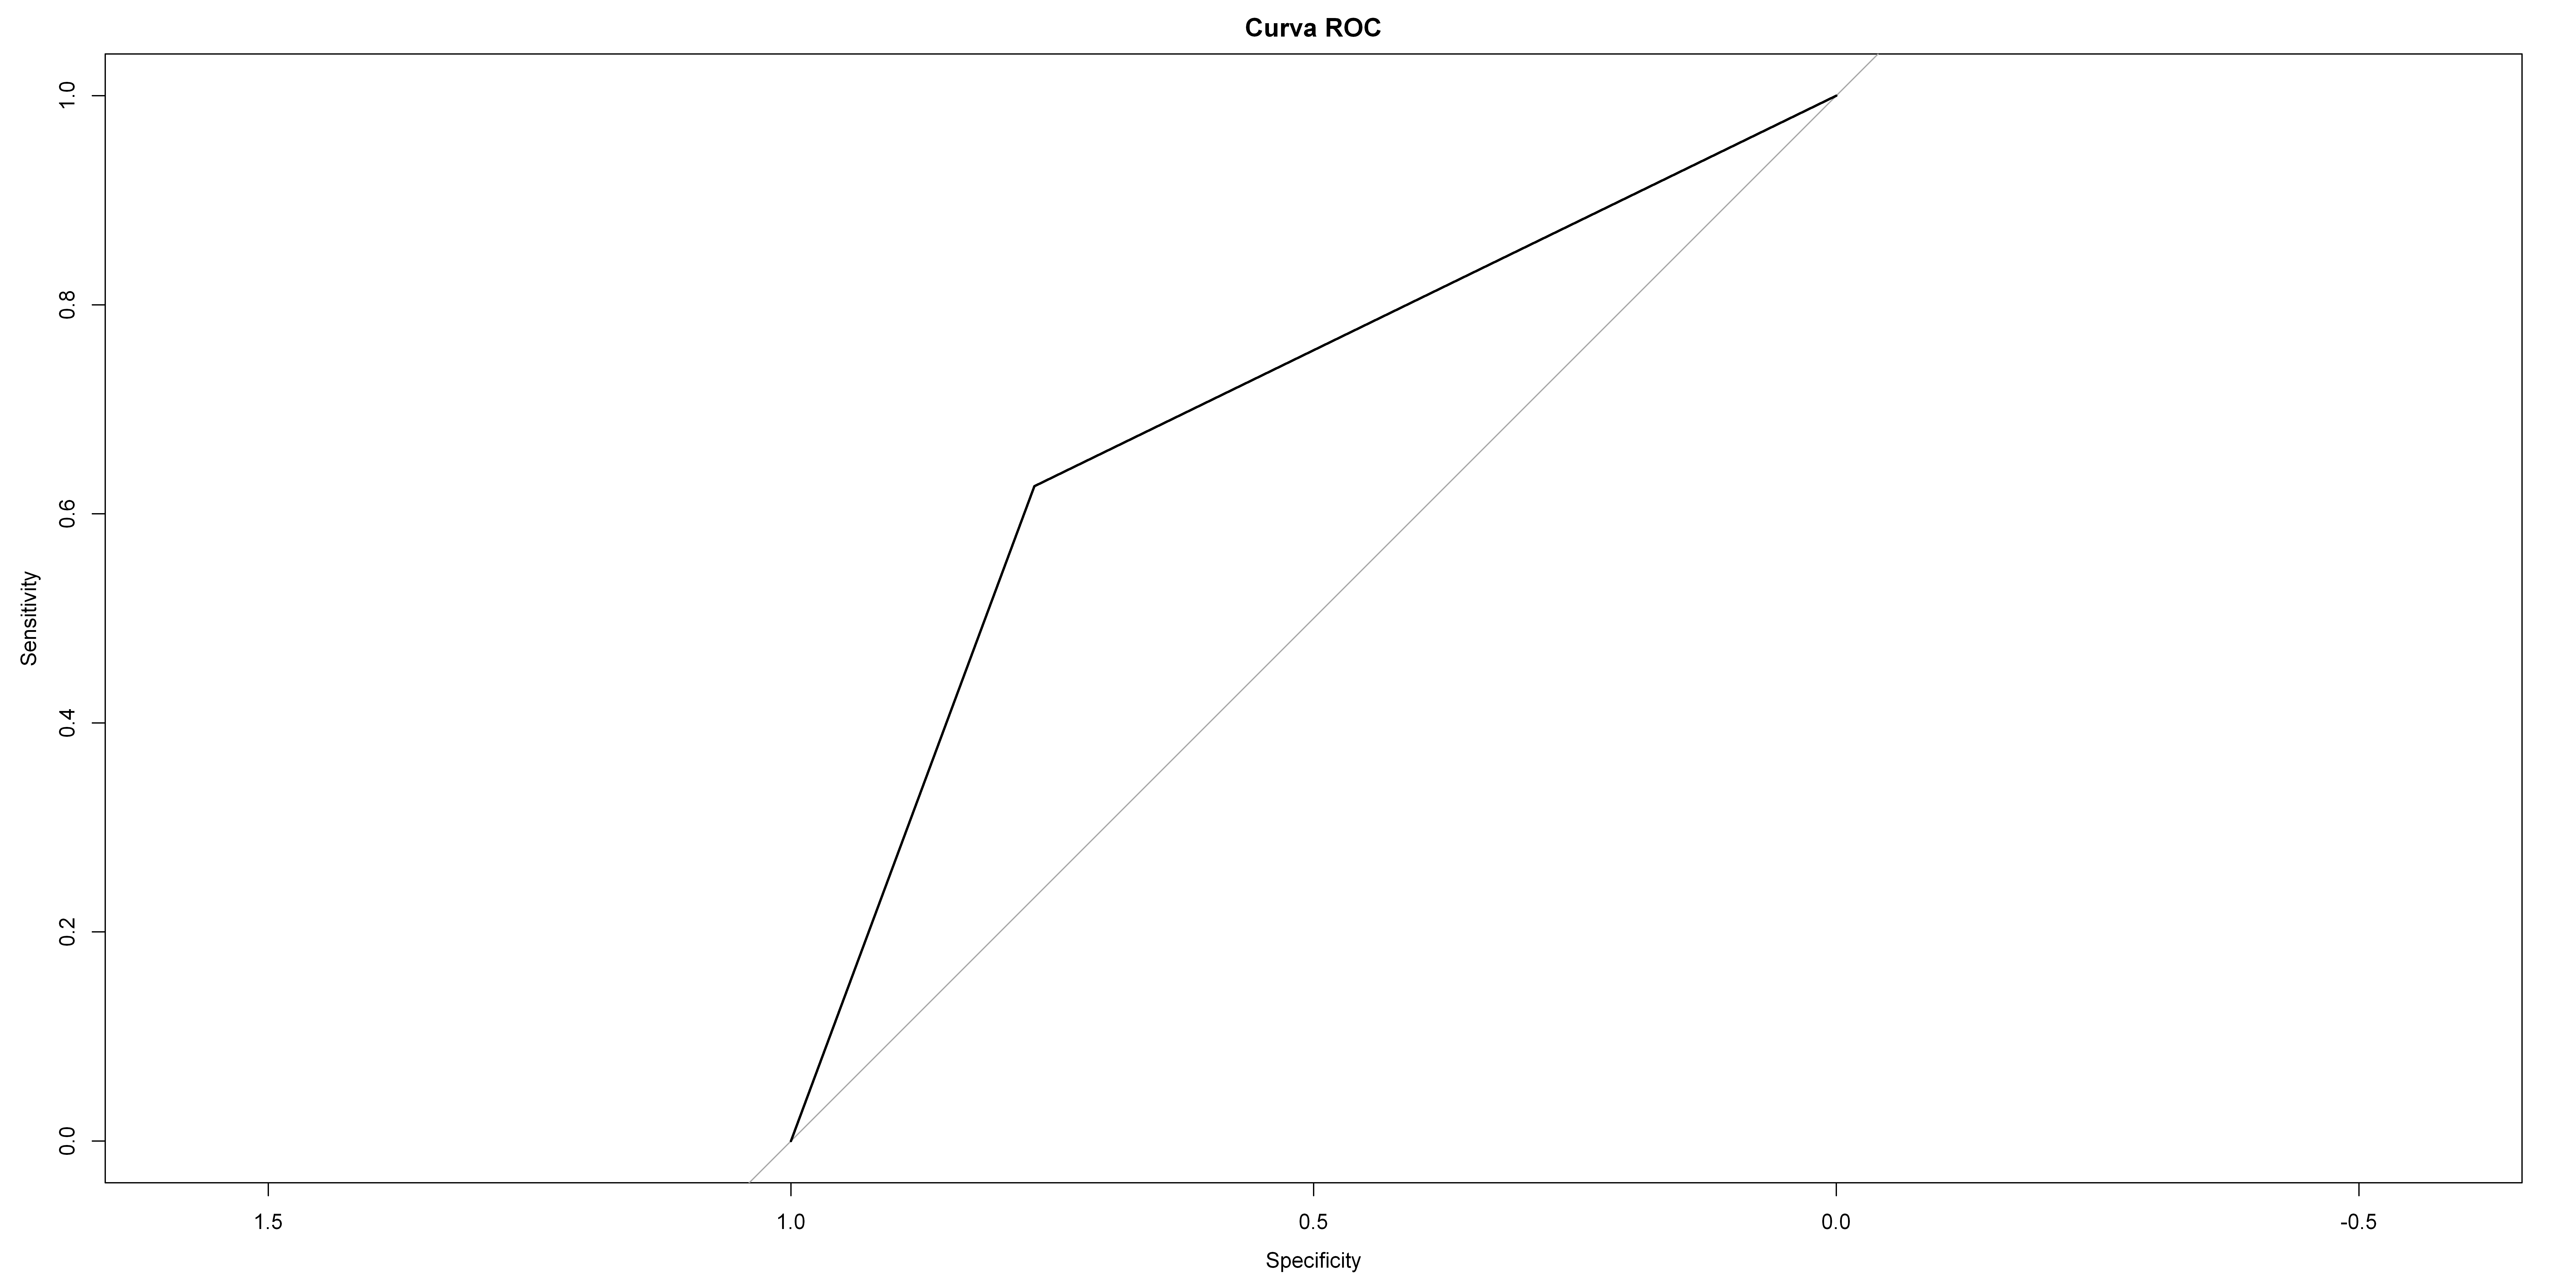

In [64]:
roc_obj <- roc(TestClasses, as.numeric(pred_regLogistic))
plot(roc_obj, main="Curva ROC")

In [65]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_regLogistic))

Data: as.numeric(pred_regLogistic) in 146 controls (TestClasses fast) < 273 cases (TestClasses NotFast).
Area under the curve: 0.6967

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



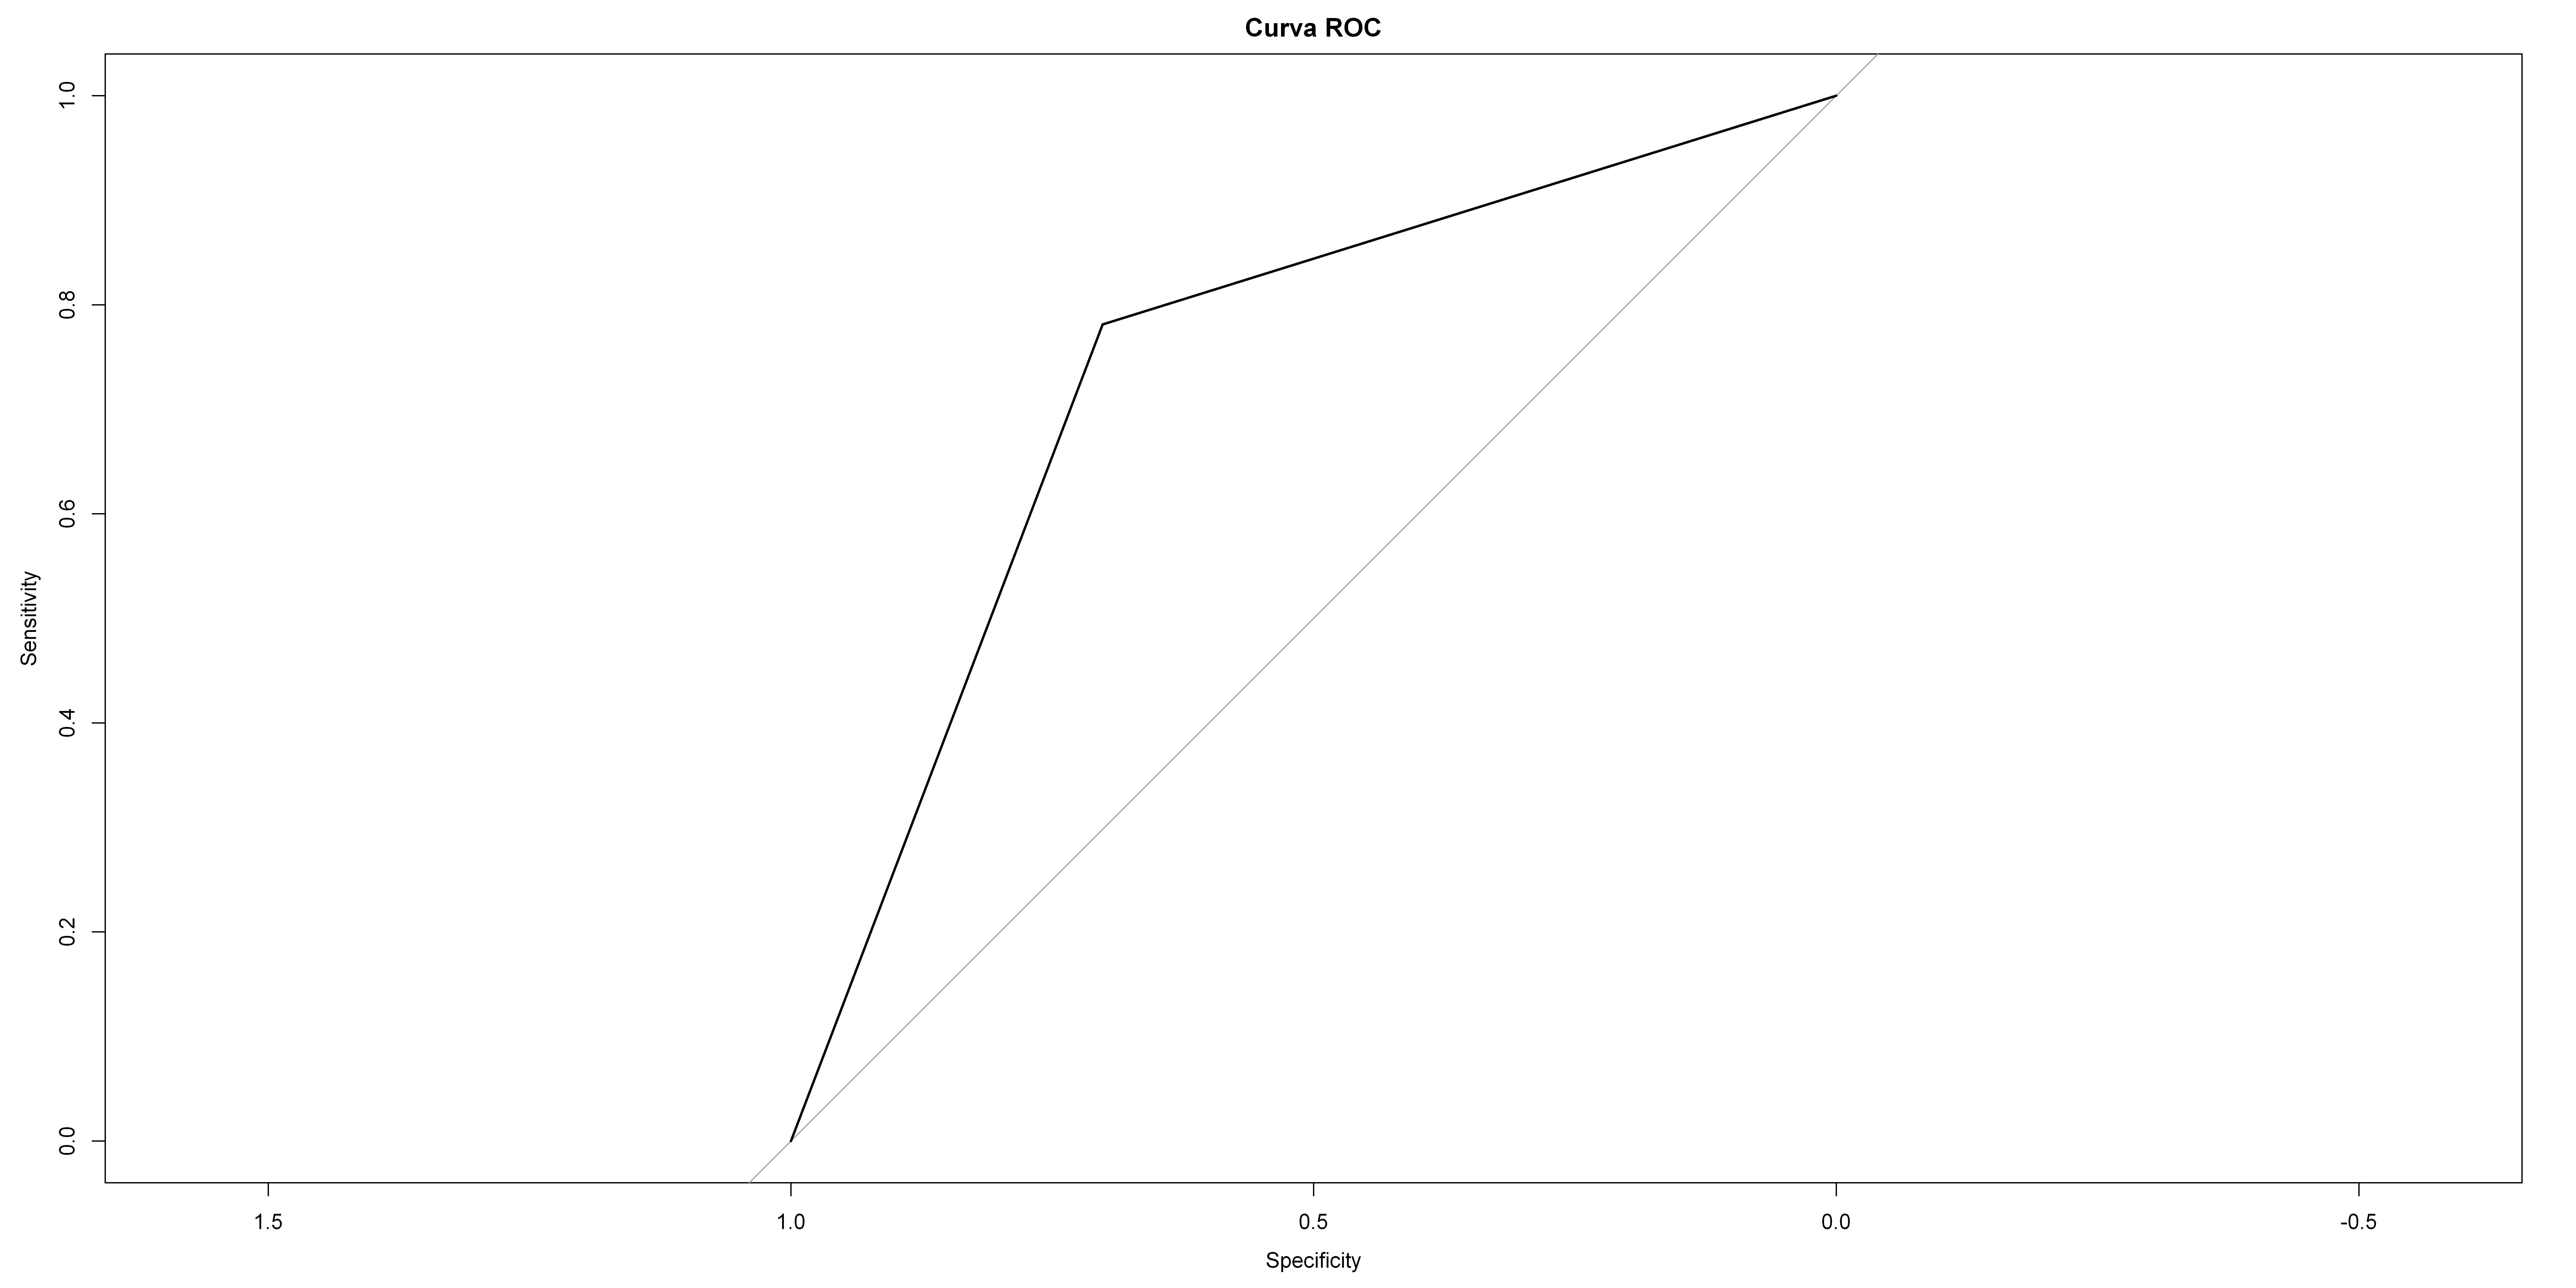

In [66]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [67]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 114 controls (TestClasses fast) < 201 cases (TestClasses NotFast).
Area under the curve: 0.7414